In [1]:
import os
import pandas as pd
from pandas.core.frame import DataFrame
import numpy as np
import jieba

import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
from wordcloud import WordCloud,ImageColorGenerator
import imageio
# import snownlp  # 也jieba 一样的分词库
# from snownlp import SnowNLP

In [2]:
os.getcwd()

'D:\\notebook\\9_电商文本挖掘案例练习'

##### 版本问题

 wheel安装步骤 
    - 下载适合自己python版本的包：https://www.lfd.uci.edu/~gohlke/pythonlibs/  
    - pip install wheel
    - 目标文件夹的cd,pip install somewhat.whl

In [3]:
print("pandas 版本：",pd.__version__)
print("numpy 版本：",np.__version__)

pandas 版本： 0.24.0
numpy 版本： 1.16.2


- 检查更新：pip list --outdated
- 更新： pip install --upgrade xxxx

pandas 0.23.4 documentation  http://pandas.pydata.org/pandas-docs/stable/index.html

# 数据处理（一）

#### 销售数据概况

In [4]:
df_raw_1 = pd.read_excel(r"D:\CDA课件\python 机器学习\7_电商文本挖掘\Product_details_rawdata.xlsx")
df_raw_1.columns

Index(['item_id', 'item_name', 'TradeName', 'price', 'total_sale',
       'month_sale', 'accum_comm', 'TM_points', 'CollectCount', 'Tastes',
       'BodyType', 'ApplicablePhase', 'Brand', 'Classification', 'Breed',
       'Manufacturer', 'Weight', 'Origin', 'ManufacturerAddress',
       'RecipeTastePrescription'],
      dtype='object')

In [5]:
df_raw_1.head(1)

,item_id,item_name,TradeName,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Tastes,BodyType,ApplicablePhase,Brand,Classification,Breed,Manufacturer,Weight,Origin,ManufacturerAddress,RecipeTastePrescription
0,19045209534,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,德国牧羊犬幼犬专用粮 12kg,650.0,2046,39,418,325,348,其他,通用型,幼犬,ROYAL CANIN/皇家,专用粮,德国牧羊犬,皇誉宠物食品（上海）有限公司,12000,中国,上海,NaN


In [6]:
df_raw_1.isnull().sum()

item_id                      0
item_name                    0
TradeName                    0
price                        0
total_sale                   0
month_sale                   0
accum_comm                   0
TM_points                    0
CollectCount                 0
Tastes                       0
BodyType                    46
ApplicablePhase              0
Brand                        0
Classification              35
Breed                       27
Manufacturer                 0
Weight                       0
Origin                       0
ManufacturerAddress          0
RecipeTastePrescription    104
dtype: int64

In [7]:
len(df_raw_1)

183

In [8]:
df_raw_1.describe() 

,item_id,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Weight
count,1.830000e+02,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,2.669680e+11,307.403279,11136.404372,407.229508,2648.890710,153.508197,1879.065574,5344.699454
std,2.556689e+11,257.744147,31369.026185,1068.822091,6659.411861,128.909154,4007.666013,4927.903706
min,1.562877e+10,9.900000,15.000000,1.000000,2.000000,4.000000,13.000000,100.000000
25%,2.669303e+10,135.500000,1064.500000,39.000000,267.500000,67.500000,248.500000,2000.000000
50%,4.388117e+10,225.000000,2883.000000,149.000000,736.000000,112.000000,584.000000,3000.000000
75%,5.364667e+11,460.000000,7704.500000,322.500000,2090.000000,230.000000,1458.500000,7500.000000
max,5.649716e+11,1300.000000,337524.000000,9931.000000,56434.000000,650.000000,34370.000000,30000.000000


In [9]:
df_raw_1.describe(include='object') # 非数值型的描述

,item_name,TradeName,Tastes,BodyType,ApplicablePhase,Brand,Classification,Breed,Manufacturer,Origin,ManufacturerAddress,RecipeTastePrescription
count,183,183,183,137,183,183,148,156,183,183,183,79
unique,183,180,5,6,6,5,3,14,9,3,12,48
top,Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/4KG*4袋 28省包邮,老年犬牛肉口味、蔬菜及谷物配方犬粮 1800g,其他,通用型,成犬,ROYAL CANIN/皇家,犬粮,通用型,皇誉宠物食品（上海）有限公司,中国,上海,无
freq,1,2,130,47,92,91,104,106,91,169,79,6


describe方法用于一次性产生多个汇总统计,默认对数值型数据.对于非数值型数据,describe会产生出另外一种汇总统计.

In [10]:
df_raw_1.item_name.describe()#  单个字段的描述

count                                           183
unique                                          183
top       Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/4KG*4袋  28省包邮
freq                                              1
Name: item_name, dtype: object

共有183种不同的产品

##### 品牌

In [11]:
df_raw_1.Brand.describe()

count                183
unique                 5
top       ROYAL CANIN/皇家
freq                  91
Name: Brand, dtype: object

In [12]:
df_raw_1.Brand.value_counts(dropna=False)  # 单个字段按计数 描述更详细的信息

ROYAL CANIN/皇家       91
Pedigree/宝路          38
Nature Bridge/比瑞吉    28
Fish4Dogs/海洋之星       24
Chappi/佳贝             2
Name: Brand, dtype: int64

##### 口味

In [13]:
df_raw_1.Tastes.describe()

count     183
unique      5
top        其他
freq      130
Name: Tastes, dtype: object

In [14]:
df_raw_1.Tastes.unique()  # 用 unique()来查看所有类别

array(['其他', '牛肉味', '鸡肉味', '鱼肉味', '深海鱼味'], dtype=object)

In [15]:
df_raw_1.Tastes.value_counts(dropna=False) # 相比上面 vaule_counts 显示的信息更多

其他      130
鱼肉味      25
牛肉味      17
鸡肉味       9
深海鱼味      2
Name: Tastes, dtype: int64

##### 适用体型

In [16]:
df_raw_1.BodyType.describe()

count     137
unique      6
top       通用型
freq       47
Name: BodyType, dtype: object

In [17]:
df_raw_1.BodyType.unique()

array(['通用型', nan, '大型犬', '小型犬', '中型犬', '中小型犬', '中大型犬'], dtype=object)

In [18]:
df_raw_1.BodyType.value_counts(dropna=False)  # 这样也可以查看缺失值

通用型     47
小型犬     46
NaN     46
大型犬     20
中小型犬    16
中型犬      6
中大型犬     2
Name: BodyType, dtype: int64

##### 适用年龄

In [19]:
df_raw_1.ApplicablePhase.describe()

count     183
unique      6
top        成犬
freq       92
Name: ApplicablePhase, dtype: object

In [20]:
df_raw_1.ApplicablePhase.value_counts(dropna=False)

成犬                               92
幼犬                               55
老年犬                              13
全犬期                              12
离乳期                               7
使用于怀孕42天起的母犬、哺乳期母犬及2月龄以下离乳期幼犬     4
Name: ApplicablePhase, dtype: int64

##### 狗粮种类

In [21]:
df_raw_1.Classification.describe()

count     148
unique      3
top        犬粮
freq      104
Name: Classification, dtype: object

In [22]:
df_raw_1.Classification.value_counts(dropna=False)

犬粮     104
专用粮     36
NaN     35
奶糕       8
Name: Classification, dtype: int64

##### 适用品种

In [23]:
df_raw_1.Breed.describe()

count     156
unique     14
top       通用型
freq      106
Name: Breed, dtype: object

In [24]:
df_raw_1.Breed.value_counts(dropna=False)

通用型       106
NaN        27
贵宾/泰迪      15
金毛          4
日本柴犬        4
拉布拉多        4
约克夏梗        4
斗牛犬         4
德国牧羊犬       3
雪纳瑞         3
比熊          3
可卡          2
吉娃娃         2
博美          1
西部高地白梗      1
Name: Breed, dtype: int64

##### 功能性配方

In [25]:
df_raw_1.RecipeTastePrescription.describe()

count     79
unique    48
top        无
freq       6
Name: RecipeTastePrescription, dtype: object

In [26]:
df_raw_1.RecipeTastePrescription.value_counts()

无                               6
鸡肉味                             5
牛肉口味                            5
海藻胡萝卜粒配方                        4
牛肉味                             3
牛肉、肝、蔬菜及谷物味                     3
鱼肉味                             2
精选肉类、奶、蔬菜及谷物味                   2
无谷物深海鱼大颗粒配方                     2
深海鱼配方                           2
牛肉、鸡肉、蔬菜及谷物配方                   2
三文鱼                             2
无谷六种肉配方                         2
牛肉口味、蔬菜及谷物配方                    2
肉果蔬粗粮配方                         2
深海鱼味                            2
鸡肉口味                            2
泌尿道调理                           1
幼犬无谷物深海鱼小颗粒6kg                  1
绝育低卡调理                          1
精选海洋营养加强体重控制三文鱼配方               1
牛肉鸡肉蔬菜味                         1
肠道调理                            1
肾脏调理                            1
牛肉、肝、蔬菜及谷物配方                    1
无谷物深海鱼小颗粒配方                     1
无谷物深海鱼幼犬配方大颗粒                   1
精选海洋营养加强三文鱼幼犬配方                 1
精选肉类、肝、蔬菜及谷物味                   1
Superior（优级）三文

##### 原产国

In [27]:
df_raw_1.Origin.describe()

count     183
unique      3
top        中国
freq      169
Name: Origin, dtype: object

In [28]:
df_raw_1.Origin.value_counts(dropna=False)

中国     169
比利时     10
其他       4
Name: Origin, dtype: int64

##### 厂商地址

In [29]:
df_raw_1.ManufacturerAddress.describe()

count     183
unique     12
top        上海
freq       79
Name: ManufacturerAddress, dtype: object

In [30]:
df_raw_1.ManufacturerAddress.value_counts(dropna=False)

上海                                    79
北京                                    35
上海市金山区                                20
山东省聊城市经济开发区牡丹江路8号                     10
Terdonkkaai 16, 9042 Gent, Belgium    10
上海奉贤区肖南路475号                           8
上海市金山区亭卫公路                             7
中国                                     5
Fish4Dogs.Ltd                          4
上海上海奉贤区肖南路475号                         2
皇誉宠物食品（上海）有限公司                         2
上海金山区                                  1
Name: ManufacturerAddress, dtype: int64

数据概括总结：
- 一共有183种不同产品
- 分别来自于4种主流品牌
- 商品属性信息有：商品名，种类，适用品种，适用体型，适用年龄，净重，功能性配方
- 商品销售信息有：价格，总销售量，月销售量，累计评论，收藏量，

#### 数据缺失值处理

存在缺失值的关键变量：适用体型(46)、种类(35)、适用品种(28)，功能性配方(71)

In [31]:
import jieba

In [32]:
# import jieba.posseg as psg

In [33]:
jieba.__version__  # 0.38

'0.39'

对最详细的产品名进行分词处理

In [34]:
df_raw_1.item_name[1]

'Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮'

In [35]:
b = jieba.cut(df_raw_1.item_name[1])
for i in b:
    print(i)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Robin\AppData\Local\Temp\jieba.cache
Loading model cost 1.152 seconds.
Prefix dict has been built succesfully.


Royal
 
Canin
皇家
狗
粮
 
柴犬
幼犬
专用
粮
SIJ29
/
3KG
 
犬
主粮
狗
粮


jieba.cut 与jieba.lcut的区别  cut-generator  lcut-list

In [36]:
type(b)

generator

存在专有名词，默认无法分割正确时，加入特定词语list

In [37]:
 jieba.load_userdict('AddWords.txt')  # 自定义dict   load_userdict

In [38]:
c = jieba.lcut(df_raw_1.item_name[1])
c

['Royal',
 ' ',
 'Canin',
 '皇家',
 '狗粮',
 ' ',
 '柴犬',
 '幼犬',
 '专用粮',
 'SIJ29',
 '/',
 '3KG',
 ' ',
 '犬主粮',
 '狗粮']

对所有item name 进行分词，添加到源数据中

In [39]:
item_cut=[]
for i in df_raw_1.item_name:
    j=jieba.lcut(i)
    item_cut.append(j)

In [40]:
df_raw_1['item_name_cut'] = item_cut

In [41]:
df_raw_1[['item_name','item_name_cut']]

,item_name,item_name_cut
0,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 德牧, 幼犬粮, AGS30, ..."
1,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2..."
2,皇家狗粮 大型犬奶糕MAS30 4KG哺乳孕期犬离乳期幼犬牧羊阿拉斯加,"[皇家, 狗粮, , 大型犬, 奶糕, MAS30, , 4KG, 哺乳, 孕期, 犬离..."
3,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ..."
4,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,..."
5,Royal Canin皇家狗粮 小型犬老年犬狗粮SPR27/0.8kg公斤 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 小型犬, 老年犬, 狗粮, SPR..."
6,Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/15KG 犬主粮28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 幼犬粮, MAJ30, ..."
7,Royal Canin皇家狗粮 约克夏成犬专用粮PRY28/1.5KG 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 约克夏, 成犬, 专用粮, PRY..."
8,皇家狗粮 小型犬成犬通用型PR27 2KG 博美迷你腊肠京巴八哥全犬种,"[皇家, 狗粮, , 小型犬, 成犬, 通用型, PR27, , 2KG, , 博美,..."
9,Royal Canin皇家狗粮 法国斗牛犬幼犬粮FBJ30/3KG 法斗粮,"[Royal, , Canin, 皇家, 狗粮, , 法国, 斗牛犬, 幼犬粮, FBJ..."


###### 种类，适用品种

In [42]:
df_raw_1.Classification.value_counts(dropna=False)

犬粮     104
专用粮     36
NaN     35
奶糕       8
Name: Classification, dtype: int64

存在35条空值

In [43]:
len(df_raw_1[df_raw_1.Classification.isnull()])

35

In [44]:
df_raw_1[df_raw_1.Classification.isnull()][['item_name','item_name_cut']]

,item_name,item_name_cut
1,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2..."
3,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ..."
4,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,..."
12,皇家狗粮 吉娃娃成犬专用粮食C28 1.5KG*2 小型犬 28省包邮,"[皇家, 狗粮, , 吉娃娃, 成犬, 专用, 粮食, C28, , 1.5, KG, ..."
26,Royal Canin皇家狗粮 金毛幼犬粮AGR29 3.5KG 大型犬狗粮精品热卖,"[Royal, , Canin, 皇家, 狗粮, , 金毛, 幼犬粮, AGR29, ..."
30,皇家狗粮小型犬奶糕MIS30 1KG 哺乳孕期母犬 博美京巴幼犬通用型,"[皇家, 狗粮, 小型犬, 奶糕, MIS30, , 1KG, , 哺乳, 孕期, 母犬..."
33,皇家狗粮 拉布拉多成犬粮LR30 3KG*4 大型犬种 28省包邮,"[皇家, 狗粮, , 拉布拉多, 成犬粮, LR30, , 3KG, *, 4, , ..."
36,皇家小型犬奶糕MIS30 3KG*2繁育期母离乳期幼犬博美狗粮28省包邮,"[皇家, 小型犬, 奶糕, MIS30, , 3KG, *, 2, 繁育, 期母, 离乳期..."
37,Royal Canin皇家 金毛幼犬粮AGR29/3.5KG*4 犬主粮 28省包邮,"[Royal, , Canin, 皇家, , 金毛, 幼犬粮, AGR29, /, 3...."
41,Royal Canin皇家狗粮 柴犬成犬专用粮SIA26/3KG*2 犬主粮28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 成犬, 专用粮, SIA2..."


In [45]:
classi = []
for i in range(len(df_raw_1)):
    if not pd.isnull(df_raw_1.Classification[i]):
        classi.append(df_raw_1.Classification[i])  # 如果不是空值,就append本身  dict 是add   list 是append
    elif df_raw_1.Breed[i] == '通用型':  # 如果是空值 就先看berrd是不是通用型 是->犬粮  不是->专用粮
        classi.append('犬粮')
    elif not pd.isnull(df_raw_1.Breed[i]): # 只要不是空值就写专用粮
        classi.append('专用粮')
    elif '专用粮' in  df_raw_1.item_name_cut[i]:
        classi.append('专用粮')
    elif '专用' in  df_raw_1.item_name_cut[i]:
        classi.append('专用粮')
    elif '奶糕' in  df_raw_1.item_name_cut[i]:
        classi.append('奶糕')
    else:
        classi.append('犬粮')

In [46]:
df_raw_1.Classification = classi

In [47]:
df_raw_1.Classification.value_counts(dropna=False)

犬粮     122
专用粮     51
奶糕      10
Name: Classification, dtype: int64

###### 适用品种

In [48]:
df_raw_1.Breed.value_counts(dropna=False)

通用型       106
NaN        27
贵宾/泰迪      15
金毛          4
日本柴犬        4
拉布拉多        4
约克夏梗        4
斗牛犬         4
德国牧羊犬       3
雪纳瑞         3
比熊          3
可卡          2
吉娃娃         2
博美          1
西部高地白梗      1
Name: Breed, dtype: int64

存在27条空值

In [49]:
df_raw_1[df_raw_1.Breed.isnull()][['item_name','item_name_cut']]

,item_name,item_name_cut
5,Royal Canin皇家狗粮 小型犬老年犬狗粮SPR27/0.8kg公斤 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 小型犬, 老年犬, 狗粮, SPR..."
8,皇家狗粮 小型犬成犬通用型PR27 2KG 博美迷你腊肠京巴八哥全犬种,"[皇家, 狗粮, , 小型犬, 成犬, 通用型, PR27, , 2KG, , 博美,..."
13,皇家狗粮 小型犬成犬狗粮 通用型狗粮均衡营养减少牙石PR27/0.8KG,"[皇家, 狗粮, , 小型犬, 成犬, 狗粮, , 通用型, 狗粮, 均衡, 营养, 减..."
19,皇家狗粮小型犬8岁以上成犬粮SPR27 4KG*2 博美犬茶杯 28省包邮,"[皇家, 狗粮, 小型犬, 8, 岁, 以上, 成犬粮, SPR27, , 4KG, *,..."
23,皇家狗粮 中型犬奶糕MES30 4KG*2繁育母犬离乳幼柯基萨摩28省包邮,"[皇家, 狗粮, , 中型犬, 奶糕, MES30, , 4KG, *, 2, 繁育, ..."
25,Royal Canin皇家狗粮 大型犬成犬粮GR26/4KG*4包犬主粮 28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 成犬粮, GR26, /..."
32,Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/4KG*4袋 28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 幼犬粮, MAJ30, ..."
35,Royal Canin皇家狗粮 雪纳瑞幼犬粮SNJ30/1.5KG*2袋 28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 雪纳瑞, 幼犬粮, SNJ30, ..."
36,皇家小型犬奶糕MIS30 3KG*2繁育期母离乳期幼犬博美狗粮28省包邮,"[皇家, 小型犬, 奶糕, MIS30, , 3KG, *, 2, 繁育, 期母, 离乳期..."
44,皇家小型幼犬狗粮MIJ31 0.8KG*3 博美狗茶杯腊肠犬 28省包邮,"[皇家, 小型, 幼犬, 狗粮, MIJ31, , 0.8, KG, *, 3, , 博..."


In [50]:
bre = []
for i in range(len(df_raw_1)):
    if not pd.isnull(df_raw_1.Breed[i]):
        bre.append(df_raw_1.Breed[i])
    elif '雪纳瑞' in  df_raw_1.item_name_cut[i]:
        bre.append('雪纳瑞')
    elif  '德牧' in  df_raw_1.item_name_cut[i]:
        bre.append('德国牧羊犬')
    elif  '西高地' in  df_raw_1.item_name_cut[i]:
        bre.append('西部高地白梗')
    elif  '博美' in  df_raw_1.item_name_cut[i] and df_raw_1.Classification[i] =='奶糕':
        bre.append('博美')
    else:
#         bre.append(df_raw_1.item_name_cut[i])
        bre.append('通用型')

In [51]:
bre

['德国牧羊犬',
 '日本柴犬',
 '通用型',
 '雪纳瑞',
 '拉布拉多',
 '通用型',
 '通用型',
 '约克夏梗',
 '通用型',
 '斗牛犬',
 '通用型',
 '通用型',
 '吉娃娃',
 '通用型',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '贵宾/泰迪',
 '贵宾/泰迪',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '比熊',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '金毛',
 '通用型',
 '通用型',
 '约克夏梗',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '拉布拉多',
 '贵宾/泰迪',
 '雪纳瑞',
 '博美',
 '金毛',
 '通用型',
 '通用型',
 '金毛',
 '日本柴犬',
 '通用型',
 '雪纳瑞',
 '通用型',
 '拉布拉多',
 '日本柴犬',
 '通用型',
 '斗牛犬',
 '通用型',
 '通用型',
 '比熊',
 '通用型',
 '贵宾/泰迪',
 '斗牛犬',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '可卡',
 '德国牧羊犬',
 '约克夏梗',
 '吉娃娃',
 '德国牧羊犬',
 '西部高地白梗',
 '通用型',
 '通用型',
 '可卡',
 '拉布拉多',
 '通用型',
 '通用型',
 '西部高地白梗',
 '通用型',
 '通用型',
 '通用型',
 '斗牛犬',
 '金毛',
 '通用型',
 '雪纳瑞',
 '通用型',
 '德国牧羊犬',
 '通用型',
 '约克夏梗',
 '通用型',
 '通用型',
 '日本柴犬',
 '通用型',
 '通用型',
 '贵宾/泰迪',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 '通用型',
 

In [52]:
for i in bre:
    if type(i) is list:
        print(i)

In [53]:
df_raw_1.Breed = bre

In [54]:
df_raw_1.Breed.value_counts(dropna=False)

通用型       128
贵宾/泰迪      15
雪纳瑞         5
金毛          4
日本柴犬        4
拉布拉多        4
德国牧羊犬       4
约克夏梗        4
斗牛犬         4
比熊          3
博美          2
可卡          2
西部高地白梗      2
吉娃娃         2
Name: Breed, dtype: int64

###### 适用体型

In [55]:
df_raw_1.BodyType.value_counts(dropna=False)

通用型     47
小型犬     46
NaN     46
大型犬     20
中小型犬    16
中型犬      6
中大型犬     2
Name: BodyType, dtype: int64

存在46条空值

In [56]:
df_raw_1[df_raw_1.BodyType.isnull()][['item_name','item_name_cut']]

,item_name,item_name_cut
1,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2..."
3,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ..."
4,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,..."
9,Royal Canin皇家狗粮 法国斗牛犬幼犬粮FBJ30/3KG 法斗粮,"[Royal, , Canin, 皇家, 狗粮, , 法国, 斗牛犬, 幼犬粮, FBJ..."
12,皇家狗粮 吉娃娃成犬专用粮食C28 1.5KG*2 小型犬 28省包邮,"[皇家, 狗粮, , 吉娃娃, 成犬, 专用, 粮食, C28, , 1.5, KG, ..."
18,皇家官方旗舰店 贵宾泰迪狗粮8岁以上老年犬PDA26 3KG热卖新品,"[皇家, 官方, 旗舰店, , 贵宾, 泰迪, 狗粮, 8, 岁, 以上, 老年犬, PD..."
33,皇家狗粮 拉布拉多成犬粮LR30 3KG*4 大型犬种 28省包邮,"[皇家, 狗粮, , 拉布拉多, 成犬粮, LR30, , 3KG, *, 4, , ..."
34,皇家8岁+贵宾泰迪老年犬粮PDA26/3KG*2 犬主粮贵宾狗粮 28省包邮,"[皇家, 8, 岁, +, 贵宾, 泰迪, 老年犬, 粮, PDA26, /, 3KG, *..."
35,Royal Canin皇家狗粮 雪纳瑞幼犬粮SNJ30/1.5KG*2袋 28省包邮,"[Royal, , Canin, 皇家, 狗粮, , 雪纳瑞, 幼犬粮, SNJ30, ..."
36,皇家小型犬奶糕MIS30 3KG*2繁育期母离乳期幼犬博美狗粮28省包邮,"[皇家, 小型犬, 奶糕, MIS30, , 3KG, *, 2, 繁育, 期母, 离乳期..."


In [57]:
bodytp = []   # 按幼犬,成年犬,迷你 可以好一点
for i in range(len(df_raw_1)):
    if not pd.isnull(df_raw_1.BodyType[i]):
        bodytp.append(df_raw_1.BodyType[i])
    elif '通用型' in  df_raw_1.item_name_cut[i]:
        bodytp.append('通用型')
    elif '通用' in  df_raw_1.item_name_cut[i]:
        bodytp.append('通用型')
    elif '小型犬' in  df_raw_1.item_name_cut[i]:
         bodytp.append('小型犬')
    elif '小型' in  df_raw_1.item_name_cut[i]:
         bodytp.append('小型犬')
    elif '中型犬' in  df_raw_1.item_name_cut[i]:
         bodytp.append('中型犬')
    elif '中型' in  df_raw_1.item_name_cut[i]:
         bodytp.append('中型犬')
    elif '大型犬' in  df_raw_1.item_name_cut[i]:
         bodytp.append('大型犬')
    elif '大型' in  df_raw_1.item_name_cut[i]:
         bodytp.append('大型犬')
    else:
#         bodytp.append(df_raw_1.item_name_cut[i])
        bodytp.append('通用型')

In [58]:
df_raw_1.BodyType = bodytp

In [59]:
df_raw_1.BodyType.value_counts(dropna=False)

通用型     75
小型犬     56
大型犬     27
中小型犬    16
中型犬      7
中大型犬     2
Name: BodyType, dtype: int64

In [60]:
df_raw_1.head()

,item_id,item_name,TradeName,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Tastes,...,ApplicablePhase,Brand,Classification,Breed,Manufacturer,Weight,Origin,ManufacturerAddress,RecipeTastePrescription,item_name_cut
0,19045209534,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,德国牧羊犬幼犬专用粮 12kg,650.0,2046,39,418,325,348,其他,...,幼犬,ROYAL CANIN/皇家,专用粮,德国牧羊犬,皇誉宠物食品（上海）有限公司,12000,中国,上海,NaN,"[Royal, , Canin, 皇家, 狗粮, , 德牧, 幼犬粮, AGS30, ..."
1,547144906363,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,日本柴犬幼犬 3000g,285.0,560,39,132,142,200,其他,...,幼犬,ROYAL CANIN/皇家,专用粮,日本柴犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,NaN,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2..."
2,26255560615,皇家狗粮 大型犬奶糕MAS30 4KG哺乳孕期犬离乳期幼犬牧羊阿拉斯加,(大型犬)离乳期奶糕 4kg,301.0,1571,27,390,150,554,其他,...,离乳期,ROYAL CANIN/皇家,奶糕,通用型,皇誉宠物食品（上海）有限公司,4000,中国,上海,NaN,"[皇家, 狗粮, , 大型犬, 奶糕, MAS30, , 4KG, 哺乳, 孕期, 犬离..."
3,39792870853,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,雪纳瑞成犬 3000g,260.0,2113,32,281,130,379,其他,...,成犬,ROYAL CANIN/皇家,专用粮,雪纳瑞,皇誉宠物食品（上海）有限公司,3000,中国,上海奉贤区肖南路475号,NaN,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ..."
4,547165690913,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,拉布拉多幼犬 3000g,210.0,643,48,173,105,318,其他,...,幼犬,ROYAL CANIN/皇家,专用粮,拉布拉多,皇誉宠物食品（上海）有限公司,3000,中国,上海,NaN,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,..."


###### 口味配方

In [61]:
df_raw_1.RecipeTastePrescription.value_counts(dropna=False)

NaN                             104
无                                 6
鸡肉味                               5
牛肉口味                              5
海藻胡萝卜粒配方                          4
牛肉味                               3
牛肉、肝、蔬菜及谷物味                       3
牛肉口味、蔬菜及谷物配方                      2
肉果蔬粗粮配方                           2
无谷物深海鱼大颗粒配方                       2
深海鱼配方                             2
牛肉、鸡肉、蔬菜及谷物配方                     2
三文鱼                               2
无谷六种肉配方                           2
鱼肉味                               2
深海鱼味                              2
精选肉类、奶、蔬菜及谷物味                     2
鸡肉口味                              2
泌尿道调理                             1
无谷物深海鱼小颗粒配方                       1
精选海洋营养加强体重控制三文鱼配方                 1
绝育低卡调理                            1
肠道调理                              1
肾脏调理                              1
幼犬无谷物深海鱼小颗粒6kg                    1
牛肉鸡肉蔬菜味                           1
牛肉、肝、蔬菜及谷物配方                      1
Superior（优级）体重控制小颗粒1.5kg    

有104条空值

In [62]:
rectaste = []
for i in range(len(df_raw_1)):
    if df_raw_1.Brand[i] == 'ROYAL CANIN/皇家':
        rectaste.append('无')
    elif df_raw_1.Manufacturer[i] == '玛氏食品（中国）有限公司':
        if not pd.isnull(df_raw_1.RecipeTastePrescription[i]):
            rectaste.append(df_raw_1.RecipeTastePrescription[i])
        elif df_raw_1.Tastes[i]!='其他':
            rectaste.append(df_raw_1.Tastes[i])
        else:
            rectaste.append('无')   
    elif df_raw_1.Brand[i] == 'Nature Bridge/比瑞吉':
        if not pd.isnull(df_raw_1.RecipeTastePrescription[i]):
            rectaste.append(df_raw_1.RecipeTastePrescription[i])
        else:
            rectaste.append('无')
    elif df_raw_1.Brand[i] == 'Fish4Dogs/海洋之星':
        if not pd.isnull(df_raw_1.RecipeTastePrescription[i]):
            rectaste.append(df_raw_1.RecipeTastePrescription[i])
        else:
            rectaste.append('鱼肉味')

In [63]:
df_raw_1.RecipeTastePrescription = rectaste

In [64]:
df_raw_1.RecipeTastePrescription.value_counts(dropna=False)

无                               106
鸡肉味                               6
牛肉味                               5
牛肉口味                              5
海藻胡萝卜粒配方                          4
鱼肉味                               3
牛肉、肝、蔬菜及谷物味                       3
精选肉类、奶、蔬菜及谷物味                     2
无谷物深海鱼大颗粒配方                       2
深海鱼配方                             2
牛肉、鸡肉、蔬菜及谷物配方                     2
三文鱼                               2
无谷六种肉配方                           2
牛肉口味、蔬菜及谷物配方                      2
肉果蔬粗粮配方                           2
深海鱼味                              2
鸡肉口味                              2
泌尿道调理                             1
幼犬无谷物深海鱼小颗粒6kg                    1
绝育低卡调理                            1
精选海洋营养加强体重控制三文鱼配方                 1
牛肉鸡肉蔬菜味                           1
肠道调理                              1
肾脏调理                              1
牛肉、肝、蔬菜及谷物配方                      1
无谷物深海鱼小颗粒配方                       1
无谷物深海鱼幼犬配方大颗粒                     1
精选海洋营养加强三文鱼幼犬配方             

#### 数据清理、整合

###### 口味配方

In [65]:
df_raw_1[df_raw_1.Brand == 'ROYAL CANIN/皇家']['RecipeTastePrescription'].value_counts()

无    91
Name: RecipeTastePrescription, dtype: int64

In [66]:
df_raw_1[df_raw_1.Manufacturer == '玛氏食品（中国）有限公司']['RecipeTastePrescription'].value_counts()

鸡肉味               6
牛肉口味              5
牛肉味               5
牛肉、肝、蔬菜及谷物味       3
无                 2
精选肉类、奶、蔬菜及谷物味     2
牛肉、鸡肉、蔬菜及谷物配方     2
鸡肉口味              2
牛肉口味、蔬菜及谷物配方      2
深海鱼味              2
精选肉类、奶、蔬菜及谷物配方    1
鸡肉、肝、蔬菜及谷物配方      1
牛肉鸡肉蔬菜味           1
牛奶、蔬菜及谷物配方        1
牛奶夹心酥             1
牛肉、肝、蔬菜及谷物配方      1
精选肉类、肝、蔬菜及谷物味     1
深海鱼、肝、蔬菜及谷物味      1
鸡肉、肝、蔬菜及谷物味       1
Name: RecipeTastePrescription, dtype: int64

In [67]:
df_raw_1[df_raw_1.Brand == 'Nature Bridge/比瑞吉']['RecipeTastePrescription'].value_counts()

无           13
海藻胡萝卜粒配方     4
无谷六种肉配方      2
肉果蔬粗粮配方      2
皮肤调理         1
心脏调理         1
肾脏调理         1
绝育低卡调理       1
泌尿道调理        1
肠道调理         1
弱体质调理        1
Name: RecipeTastePrescription, dtype: int64

In [68]:
df_raw_1[df_raw_1.Brand == 'Fish4Dogs/海洋之星']['RecipeTastePrescription'].value_counts()

鱼肉味                             3
三文鱼                             2
无谷物深海鱼大颗粒配方                     2
深海鱼配方                           2
鱼肉                              1
精选海洋营养加强体重控制三文鱼配方               1
精选海洋营养加强三文鱼幼犬配方                 1
无谷物深海鱼小颗粒配方                     1
幼犬无谷物深海鱼小颗粒6kg                  1
Superior（优级）三文鱼控制体重配方大颗粒12kg    1
精选海洋营养加强三文鱼成犬配方                 1
无谷物深海鱼幼犬配方小颗粒                   1
无谷物深海鱼幼犬配方大颗粒                   1
无谷物三文鱼玩具犬配方                     1
鱼味                              1
无谷物三文鱼大颗粒配方                     1
Superior（优级）三文鱼控制体重小颗粒6kg       1
Superior（优级）体重控制小颗粒1.5kg        1
成犬无谷物深海鱼小颗粒1.5kg                1
Name: RecipeTastePrescription, dtype: int64

In [69]:
b=jieba.lcut(df_raw_1.RecipeTastePrescription[160])
b

['精选', '海洋', '营养', '加强', '三文鱼', '成犬', '配方']

In [70]:
rectaste_2 = []
for i in range(len(df_raw_1)):
    cut_i=jieba.lcut(df_raw_1.RecipeTastePrescription[i])
    if df_raw_1.Brand[i] == 'ROYAL CANIN/皇家':
        rectaste_2.append(df_raw_1.RecipeTastePrescription[i])
    elif df_raw_1.Manufacturer[i] == '玛氏食品（中国）有限公司':
        if '蔬菜' in  cut_i:
            rectaste_2.append('营养均衡配方')
        elif '牛肉'in cut_i:
            rectaste_2.append('牛肉口味配方')
        elif '鸡肉'in cut_i:
            rectaste_2.append('鸡肉口味配方')  
        elif '深海鱼'in cut_i:
            rectaste_2.append('深海鱼味配方')      
        else:
            rectaste_2.append(df_raw_1.RecipeTastePrescription[i])   
    elif df_raw_1.Brand[i] == 'Nature Bridge/比瑞吉':
        if '六种' in  cut_i:
            rectaste_2.append('无谷多肉配方')
        elif  '果蔬' in  cut_i or '胡萝卜' in cut_i:
            rectaste_2.append('营养均衡配方')
        else:rectaste_2.append(df_raw_1.RecipeTastePrescription[i]) 
    elif df_raw_1.Brand[i] == 'Fish4Dogs/海洋之星':
        if '无谷物' in  cut_i and '三文鱼' in cut_i:
            rectaste_2.append('无谷三文鱼配方')
        elif '无谷物' in  cut_i and '深海鱼' in cut_i:
            rectaste_2.append('无谷深海鱼配方') 
        elif  '深海鱼' in cut_i :
            rectaste_2.append('深海鱼味配方') 
        elif  '三文鱼' in cut_i:
            rectaste_2.append('三文鱼味配方') 
        else:
            rectaste_2.append('鱼肉口味配方')  

        

In [71]:
df_raw_1['RecipeTastePrescription_v2'] = rectaste_2

In [72]:
pd.Series(df_raw_1.RecipeTastePrescription_v2).value_counts()

无          106
营养均衡配方      23
牛肉口味配方      10
鸡肉口味配方       8
无谷深海鱼配方      7
三文鱼味配方       7
鱼肉口味配方       6
深海鱼味配方       4
无谷多肉配方       2
无谷三文鱼配方      2
泌尿道调理        1
肾脏调理         1
肠道调理         1
心脏调理         1
弱体质调理        1
牛奶夹心酥        1
绝育低卡调理       1
皮肤调理         1
Name: RecipeTastePrescription_v2, dtype: int64

In [73]:
df_raw_1

,item_id,item_name,TradeName,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Tastes,...,Brand,Classification,Breed,Manufacturer,Weight,Origin,ManufacturerAddress,RecipeTastePrescription,item_name_cut,RecipeTastePrescription_v2
0,19045209534,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,德国牧羊犬幼犬专用粮 12kg,650.0,2046,39,418,325,348,其他,...,ROYAL CANIN/皇家,专用粮,德国牧羊犬,皇誉宠物食品（上海）有限公司,12000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 德牧, 幼犬粮, AGS30, ...",无
1,547144906363,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,日本柴犬幼犬 3000g,285.0,560,39,132,142,200,其他,...,ROYAL CANIN/皇家,专用粮,日本柴犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2...",无
2,26255560615,皇家狗粮 大型犬奶糕MAS30 4KG哺乳孕期犬离乳期幼犬牧羊阿拉斯加,(大型犬)离乳期奶糕 4kg,301.0,1571,27,390,150,554,其他,...,ROYAL CANIN/皇家,奶糕,通用型,皇誉宠物食品（上海）有限公司,4000,中国,上海,无,"[皇家, 狗粮, , 大型犬, 奶糕, MAS30, , 4KG, 哺乳, 孕期, 犬离...",无
3,39792870853,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,雪纳瑞成犬 3000g,260.0,2113,32,281,130,379,其他,...,ROYAL CANIN/皇家,专用粮,雪纳瑞,皇誉宠物食品（上海）有限公司,3000,中国,上海奉贤区肖南路475号,无,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ...",无
4,547165690913,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,拉布拉多幼犬 3000g,210.0,643,48,173,105,318,其他,...,ROYAL CANIN/皇家,专用粮,拉布拉多,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,...",无
5,19086681580,Royal Canin皇家狗粮 小型犬老年犬狗粮SPR27/0.8kg公斤 犬主粮,(小型犬)老年犬犬粮 800G,66.0,1906,46,473,33,205,其他,...,ROYAL CANIN/皇家,犬粮,通用型,皇誉宠物食品（上海）有限公司,800,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 小型犬, 老年犬, 狗粮, SPR...",无
6,18965425186,Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/15KG 犬主粮28省包邮,(大型犬)幼犬犬粮 15KG,623.0,5018,56,771,311,1163,其他,...,ROYAL CANIN/皇家,犬粮,通用型,皇誉宠物食品（上海）有限公司,15000,中国,皇誉宠物食品（上海）有限公司,无,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 幼犬粮, MAJ30, ...",无
7,26217124504,Royal Canin皇家狗粮 约克夏成犬专用粮PRY28/1.5KG 犬主粮,约克夏梗(小型犬)成犬专用粮 1.5KG,135.0,2057,31,329,67,238,其他,...,ROYAL CANIN/皇家,专用粮,约克夏梗,皇誉宠物食品（上海）有限公司,1500,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 约克夏, 成犬, 专用粮, PRY...",无
8,19738658492,皇家狗粮 小型犬成犬通用型PR27 2KG 博美迷你腊肠京巴八哥全犬种,(小型犬)成犬犬粮 2000g,141.0,2885,51,588,70,603,其他,...,ROYAL CANIN/皇家,犬粮,通用型,皇誉宠物食品（上海）有限公司,2000,中国,上海,无,"[皇家, 狗粮, , 小型犬, 成犬, 通用型, PR27, , 2KG, , 博美,...",无
9,531270854040,Royal Canin皇家狗粮 法国斗牛犬幼犬粮FBJ30/3KG 法斗粮,法国斗牛犬幼犬粮3KG1套装,259.0,1493,54,429,129,499,其他,...,ROYAL CANIN/皇家,专用粮,斗牛犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 法国, 斗牛犬, 幼犬粮, FBJ...",无


###### 品牌

In [74]:
df_raw_1.Brand.value_counts(dropna=False)

ROYAL CANIN/皇家       91
Pedigree/宝路          38
Nature Bridge/比瑞吉    28
Fish4Dogs/海洋之星       24
Chappi/佳贝             2
Name: Brand, dtype: int64

In [75]:
brand_2 = []
for i in range(len(df_raw_1)):
    if df_raw_1.Brand[i] == 'Pedigree/宝路' or df_raw_1.Brand[i] == 'Chappi/佳贝' :  # 合并
        brand_2.append('玛氏')
    elif df_raw_1.Brand[i] == 'ROYAL CANIN/皇家':
        brand_2.append('皇家')
    elif df_raw_1.Brand[i] == 'Nature Bridge/比瑞吉':
        brand_2.append('比瑞吉')
    elif df_raw_1.Brand[i] == 'Fish4Dogs/海洋之星':
        brand_2.append('海洋之星')        

In [76]:
df_raw_1['Brand_v2']= brand_2

In [77]:
df_raw_1

,item_id,item_name,TradeName,price,total_sale,month_sale,accum_comm,TM_points,CollectCount,Tastes,...,Classification,Breed,Manufacturer,Weight,Origin,ManufacturerAddress,RecipeTastePrescription,item_name_cut,RecipeTastePrescription_v2,Brand_v2
0,19045209534,Royal Canin皇家狗粮 德牧幼犬粮AGS30 12KG 大型犬狗粮28省包邮,德国牧羊犬幼犬专用粮 12kg,650.0,2046,39,418,325,348,其他,...,专用粮,德国牧羊犬,皇誉宠物食品（上海）有限公司,12000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 德牧, 幼犬粮, AGS30, ...",无,皇家
1,547144906363,Royal Canin皇家狗粮 柴犬幼犬专用粮SIJ29/3KG 犬主粮狗粮,日本柴犬幼犬 3000g,285.0,560,39,132,142,200,其他,...,专用粮,日本柴犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 柴犬, 幼犬, 专用粮, SIJ2...",无,皇家
2,26255560615,皇家狗粮 大型犬奶糕MAS30 4KG哺乳孕期犬离乳期幼犬牧羊阿拉斯加,(大型犬)离乳期奶糕 4kg,301.0,1571,27,390,150,554,其他,...,奶糕,通用型,皇誉宠物食品（上海）有限公司,4000,中国,上海,无,"[皇家, 狗粮, , 大型犬, 奶糕, MAS30, , 4KG, 哺乳, 孕期, 犬离...",无,皇家
3,39792870853,Royal Canin皇家狗粮 迷你雪纳瑞成犬粮SNZ25/3KG 犬主粮,雪纳瑞成犬 3000g,260.0,2113,32,281,130,379,其他,...,专用粮,雪纳瑞,皇誉宠物食品（上海）有限公司,3000,中国,上海奉贤区肖南路475号,无,"[Royal, , Canin, 皇家, 狗粮, , 迷你, 雪纳瑞, 成犬粮, SNZ...",无,皇家
4,547165690913,Royal Canin皇家狗粮 拉布拉多幼犬粮ALR33 3KG 大型犬全犬种热卖,拉布拉多幼犬 3000g,210.0,643,48,173,105,318,其他,...,专用粮,拉布拉多,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 拉布拉多, 幼犬粮, ALR33,...",无,皇家
5,19086681580,Royal Canin皇家狗粮 小型犬老年犬狗粮SPR27/0.8kg公斤 犬主粮,(小型犬)老年犬犬粮 800G,66.0,1906,46,473,33,205,其他,...,犬粮,通用型,皇誉宠物食品（上海）有限公司,800,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 小型犬, 老年犬, 狗粮, SPR...",无,皇家
6,18965425186,Royal Canin皇家狗粮 大型犬幼犬粮MAJ30/15KG 犬主粮28省包邮,(大型犬)幼犬犬粮 15KG,623.0,5018,56,771,311,1163,其他,...,犬粮,通用型,皇誉宠物食品（上海）有限公司,15000,中国,皇誉宠物食品（上海）有限公司,无,"[Royal, , Canin, 皇家, 狗粮, , 大型犬, 幼犬粮, MAJ30, ...",无,皇家
7,26217124504,Royal Canin皇家狗粮 约克夏成犬专用粮PRY28/1.5KG 犬主粮,约克夏梗(小型犬)成犬专用粮 1.5KG,135.0,2057,31,329,67,238,其他,...,专用粮,约克夏梗,皇誉宠物食品（上海）有限公司,1500,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 约克夏, 成犬, 专用粮, PRY...",无,皇家
8,19738658492,皇家狗粮 小型犬成犬通用型PR27 2KG 博美迷你腊肠京巴八哥全犬种,(小型犬)成犬犬粮 2000g,141.0,2885,51,588,70,603,其他,...,犬粮,通用型,皇誉宠物食品（上海）有限公司,2000,中国,上海,无,"[皇家, 狗粮, , 小型犬, 成犬, 通用型, PR27, , 2KG, , 博美,...",无,皇家
9,531270854040,Royal Canin皇家狗粮 法国斗牛犬幼犬粮FBJ30/3KG 法斗粮,法国斗牛犬幼犬粮3KG1套装,259.0,1493,54,429,129,499,其他,...,专用粮,斗牛犬,皇誉宠物食品（上海）有限公司,3000,中国,上海,无,"[Royal, , Canin, 皇家, 狗粮, , 法国, 斗牛犬, 幼犬粮, FBJ...",无,皇家


# 竞品概览

品牌介绍

In [78]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 显示负轴

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

#### 产品数量

In [79]:
df_raw_1.groupby('Brand_v2').item_name.count().sort_values(ascending=False)

Brand_v2
皇家      91
玛氏      40
比瑞吉     28
海洋之星    24
Name: item_name, dtype: int64

Text(0.5,1,'产品数量')

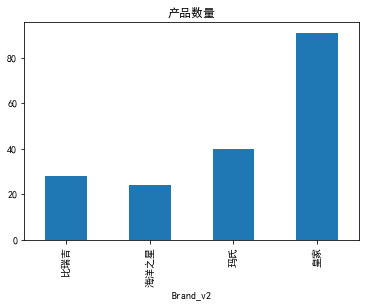

In [80]:
# df_raw_1.groupby('Brand_v2').item_name.count().sort_values(ascending=False).plot(kind='bar')
df_raw_1.groupby('Brand_v2').item_name.count().plot(kind='bar')
plt.title('产品数量')

#### 总销量

In [81]:
pd.core.groupby.SeriesGroupBy?

Text(0.5,1,'产品总销量')

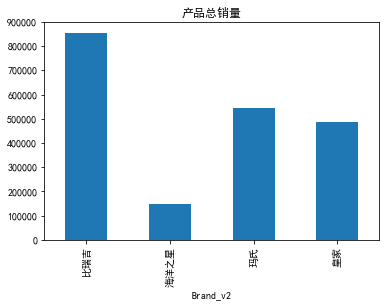

In [82]:
df_raw_1.groupby('Brand_v2').total_sale.sum().plot(kind='bar')
plt.title('产品总销量')

#### 总销售额

In [83]:
df_raw_1['total_amount'] = df_raw_1.price * df_raw_1.total_sale

Text(0.5,1,'产品总销售额')

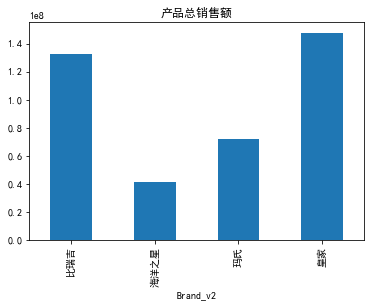

In [84]:
df_raw_1.groupby('Brand_v2').total_amount.sum().plot(kind='bar')
plt.title('产品总销售额')

#### 月销量

Text(0.5,1,'产品月销量')

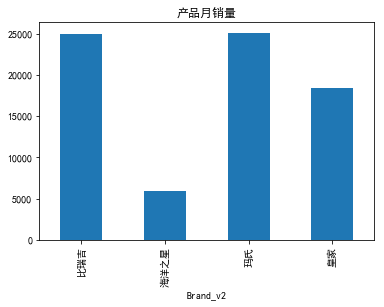

In [85]:
df_raw_1.groupby('Brand_v2').month_sale.sum().plot(kind='bar')
plt.title('产品月销量')

#### 月销售额

In [86]:
df_raw_1['month_amount'] = df_raw_1.price * df_raw_1.month_sale

Text(0.5,1,'产品月销售额')

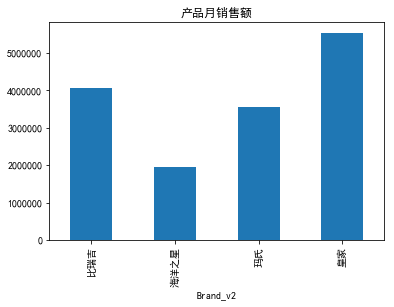

In [87]:
df_raw_1.groupby('Brand_v2').month_amount.sum().plot(kind='bar')
plt.title('产品月销售额')

#### 收藏数

Text(0.5,1,'收藏数')

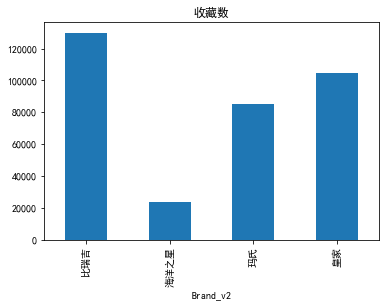

In [88]:
df_raw_1.groupby('Brand_v2').CollectCount.sum().plot(kind='bar')
plt.title('收藏数')

Text(0.5,1,'平均收藏数')

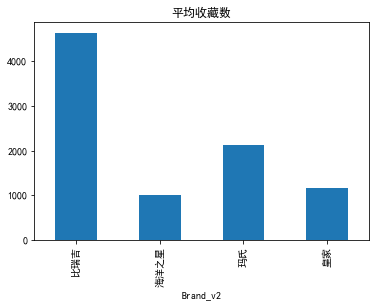

In [89]:
avg_collect = df_raw_1.groupby('Brand_v2').CollectCount.sum()/df_raw_1.groupby('Brand_v2').CollectCount.count()
avg_collect.plot(kind='bar')
plt.title('平均收藏数')

#### 评论数

Text(0.5,1,'评论数')

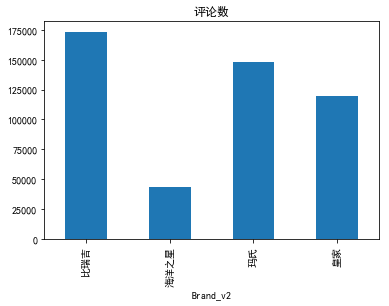

In [90]:
df_raw_1.groupby('Brand_v2').accum_comm.sum().plot(kind='bar')
plt.title('评论数')

Text(0.5,1,'平均评论数')

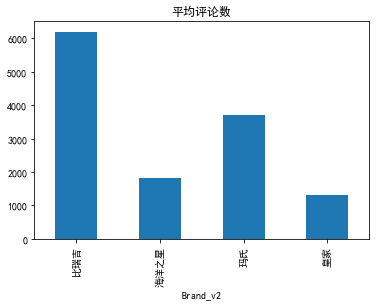

In [91]:
avg_comm = df_raw_1.groupby('Brand_v2').accum_comm.sum()/df_raw_1.groupby('Brand_v2').accum_comm.count()
avg_comm.plot(kind='bar')
plt.title('平均评论数')

# 产品分析

#### 适用种类

In [92]:
hj_class = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Classification').item_name.count()
hj_class

Classification
专用粮    44
奶糕      8
犬粮     39
Name: item_name, dtype: int64

In [93]:
ms_class = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('Classification').item_name.count()
bjr_class = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('Classification').item_name.count()
hy_class = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('Classification').item_name.count()

Text(0.5,1,'适用种类')

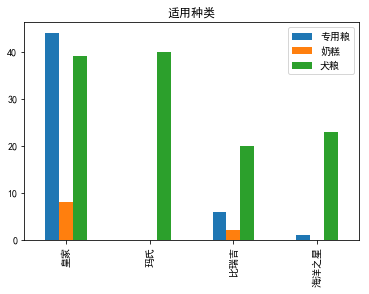

In [94]:
classfication = pd.DataFrame([hj_class,ms_class,bjr_class,hy_class])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
classfication.plot(kind='bar')
plt.title('适用种类')

In [95]:
pd.DataFrame.reset_index?

#### 适用品种

In [96]:
hj_breed = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').item_name.count()
hj_breed

Breed
博美         1
可卡         2
吉娃娃        2
德国牧羊犬      4
拉布拉多       4
斗牛犬        4
日本柴犬       4
比熊         2
约克夏梗       4
西部高地白梗     2
贵宾/泰迪     11
通用型       43
金毛         4
雪纳瑞        4
Name: item_name, dtype: int64

In [97]:
ms_breed = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('Breed').item_name.count()
bjr_breed = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('Breed').item_name.count()
hy_breed = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('Breed').item_name.count()

Text(0.5,1,'适用品种')

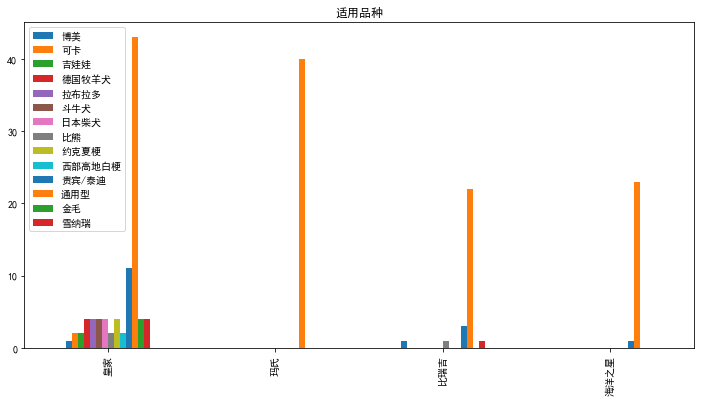

In [98]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
classfication = pd.DataFrame([hj_breed,ms_breed,bjr_breed,hy_breed])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
classfication.plot(kind='bar')
plt.title('适用品种')

#### 适用体型

In [99]:
hj_body = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('BodyType').item_name.count()
hj_body

BodyType
中型犬     6
大型犬    19
小型犬    38
通用型    28
Name: item_name, dtype: int64

In [100]:
ms_body = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('BodyType').item_name.count()
bjr_body = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('BodyType').item_name.count()
hy_body = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('BodyType').item_name.count()

Text(0.5,1,'适用体型')

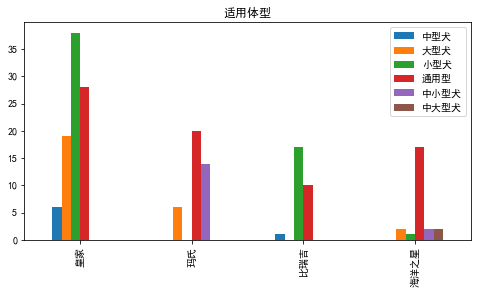

In [101]:
matplotlib.rcParams['figure.figsize'] = (8.0, 4.0)
classfication = pd.DataFrame([hj_body,ms_body,bjr_body,hy_body])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
classfication.plot(kind='bar')
plt.title('适用体型')

#### 适用年龄

In [102]:
hj_age = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('ApplicablePhase').item_name.count()
hj_age

ApplicablePhase
使用于怀孕42天起的母犬、哺乳期母犬及2月龄以下离乳期幼犬     4
幼犬                               31
成犬                               43
离乳期                               5
老年犬                               8
Name: item_name, dtype: int64

In [103]:
ms_age = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('ApplicablePhase').item_name.count()
bjr_age = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('ApplicablePhase').item_name.count()
hy_age = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('ApplicablePhase').item_name.count()

Text(0.5,1,'适用年龄')

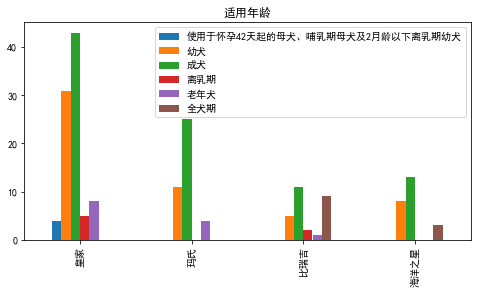

In [104]:
classfication = pd.DataFrame([hj_age,ms_age,bjr_age,hy_age])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
classfication.plot(kind='bar')
plt.title('适用年龄')

#### 口味配方

In [105]:
hj_taste = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('RecipeTastePrescription_v2').item_name.count()
hj_taste

RecipeTastePrescription_v2
无    91
Name: item_name, dtype: int64

In [106]:
ms_taste = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').item_name.count()
bjr_taste = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').item_name.count()
hy_taste = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').item_name.count()

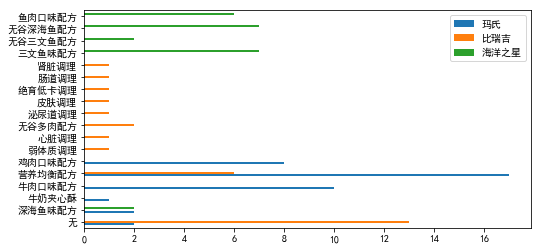

In [107]:
classfication = pd.DataFrame([ms_taste,bjr_taste,hy_taste])   # 不要皇家  全是无  没有意义
classfication.index =['玛氏','比瑞吉','海洋之星']
classfication.T.plot(kind='barh')

In [108]:
pd.DataFrame.plot?

In [109]:
classfication

,无,深海鱼味配方,牛奶夹心酥,牛肉口味配方,营养均衡配方,鸡肉口味配方,弱体质调理,心脏调理,无谷多肉配方,泌尿道调理,皮肤调理,绝育低卡调理,肠道调理,肾脏调理,三文鱼味配方,无谷三文鱼配方,无谷深海鱼配方,鱼肉口味配方
玛氏,2.0,2.0,1.0,10.0,17.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
比瑞吉,13.0,NaN,NaN,NaN,6.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
海洋之星,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,7.0,6.0


In [110]:
classfication.T['玛氏']

无           2.0
深海鱼味配方      2.0
牛奶夹心酥       1.0
牛肉口味配方     10.0
营养均衡配方     17.0
鸡肉口味配方      8.0
弱体质调理       NaN
心脏调理        NaN
无谷多肉配方      NaN
泌尿道调理       NaN
皮肤调理        NaN
绝育低卡调理      NaN
肠道调理        NaN
肾脏调理        NaN
三文鱼味配方      NaN
无谷三文鱼配方     NaN
无谷深海鱼配方     NaN
鱼肉口味配方      NaN
Name: 玛氏, dtype: float64

Text(0.5,1,'海洋之星')

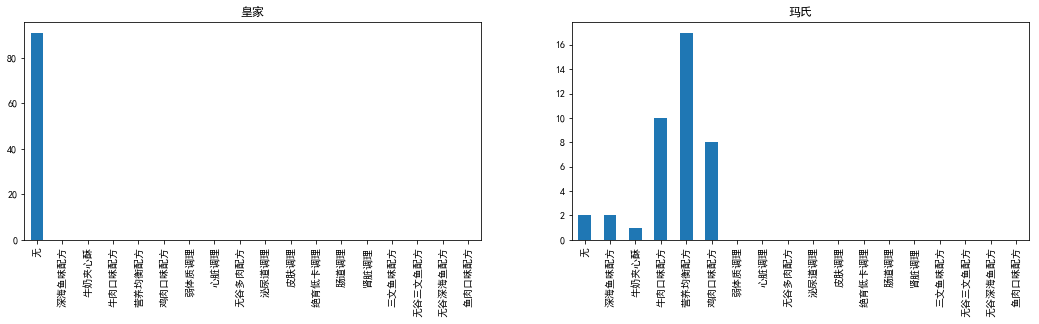

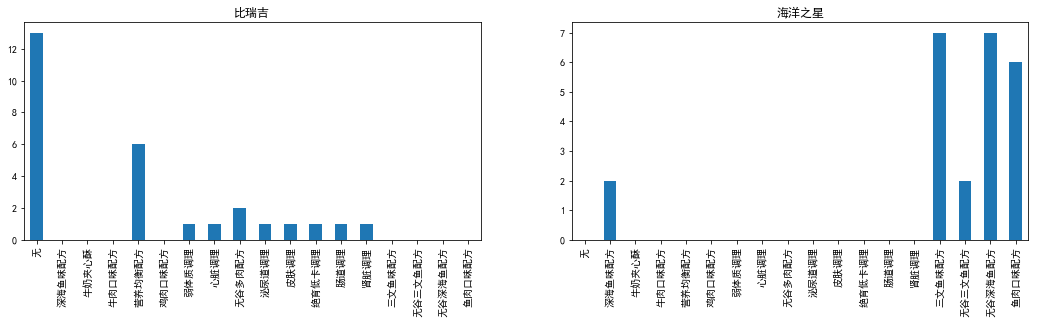

In [111]:
classfication = pd.DataFrame([hj_taste,ms_taste,bjr_taste,hy_taste])
classfication.index =['皇家','玛氏','比瑞吉','海洋之星']
plt.figure(1,figsize = (18,4))
plt.subplot(121)
classfication.T['皇家'].plot(kind = 'bar')   #  T 转换索引
plt.title('皇家')
plt.subplot(122)
classfication.T['玛氏'].plot(kind = 'bar')
plt.title('玛氏')

plt.figure(2,figsize = (18,4))   #第二张画布
plt.subplot(121)
classfication.T['比瑞吉'].plot(kind = 'bar')
plt.title('比瑞吉')
plt.subplot(122)
classfication.T['海洋之星'].plot(kind = 'bar')
plt.title('海洋之星')


In [112]:
plt.bar?

#### 对于皇家的细分析品种狗粮，销量情况如何？

皇家最大的特色- 狗狗种类齐全

In [113]:
df_raw_1.columns

Index(['item_id', 'item_name', 'TradeName', 'price', 'total_sale',
       'month_sale', 'accum_comm', 'TM_points', 'CollectCount', 'Tastes',
       'BodyType', 'ApplicablePhase', 'Brand', 'Classification', 'Breed',
       'Manufacturer', 'Weight', 'Origin', 'ManufacturerAddress',
       'RecipeTastePrescription', 'item_name_cut',
       'RecipeTastePrescription_v2', 'Brand_v2', 'total_amount',
       'month_amount'],
      dtype='object')

Text(0.5,1,'适用品种 总销量')

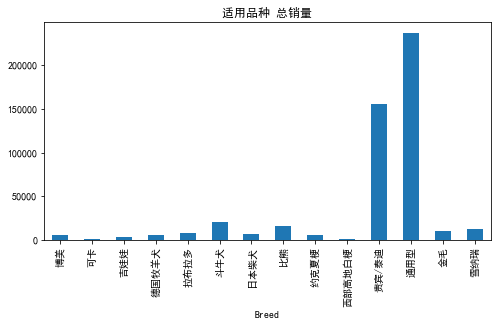

In [114]:
hj_breed_sale = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').total_sale.sum()#.plot(kind ='bar')
hj_breed_sale.plot(kind ='bar')
plt.title('适用品种 总销量')

Text(0.5,1,'适用品种 产品数')

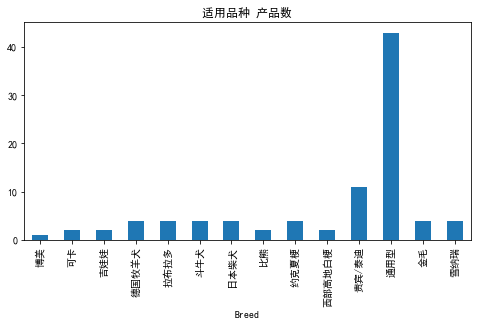

In [115]:
hj_breed = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').item_name.count()#.plot(kind ='bar')
hj_breed.plot(kind ='bar')
plt.title('适用品种 产品数')

Text(0.5,1,'适用品种 总销量/产品数')

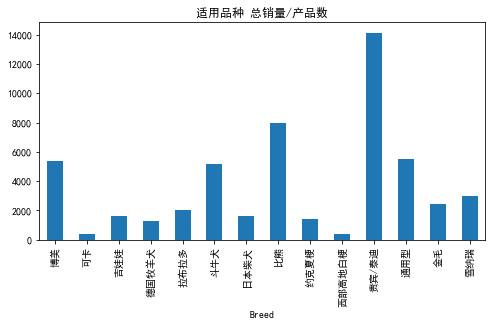

In [116]:
hj_breed_avg_sale =hj_breed_sale/hj_breed   # 在考虑 到产品数影响后的 销量
hj_breed_avg_sale.plot(kind ='bar')
plt.title('适用品种 总销量/产品数')

狗粮种类

Text(0.5,1,'适用狗粮种类 总销量')

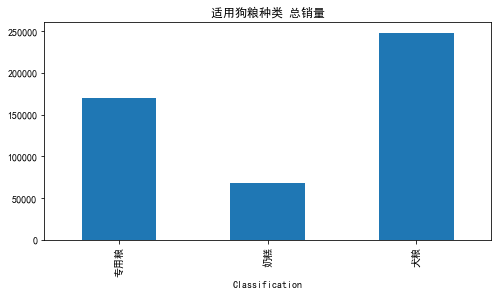

In [117]:
hj_classifi_sale = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Classification').total_sale.sum()#.plot(kind ='bar')
hj_classifi_sale.plot(kind ='bar')
plt.title('适用狗粮种类 总销量')


Text(0.5,1,'适用狗粮种类 产品数')

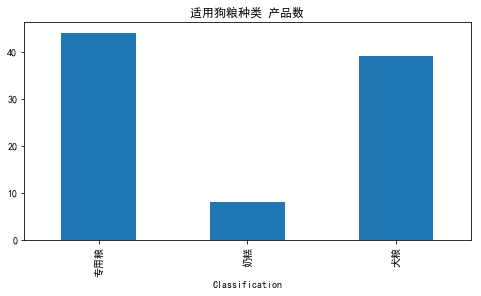

In [118]:
hj_classifi = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Classification').item_name.count()#.plot(kind ='bar')
hj_classifi.plot(kind ='bar')
plt.title('适用狗粮种类 产品数')

Text(0.5,1,'适用狗粮种类 总销量/产品数')

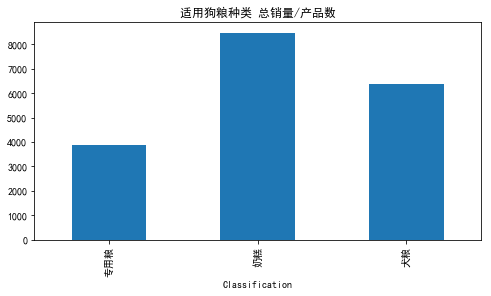

In [119]:
hj_classifi_avg_sale =hj_classifi_sale/hj_classifi
hj_classifi_avg_sale.plot(kind ='bar')
plt.title('适用狗粮种类 总销量/产品数')

#### 比瑞吉的配方粮哪个最畅销？

Text(0.5,1,'口味配方 产品数')

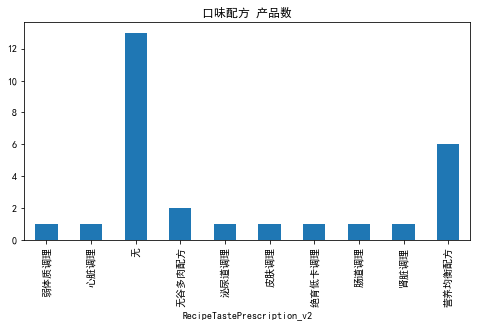

In [120]:
bjr_taste = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').item_name.count()#
bjr_taste.plot(kind ='bar')
plt.title('口味配方 产品数')

Text(0.5,1,'口味配方 总销量')

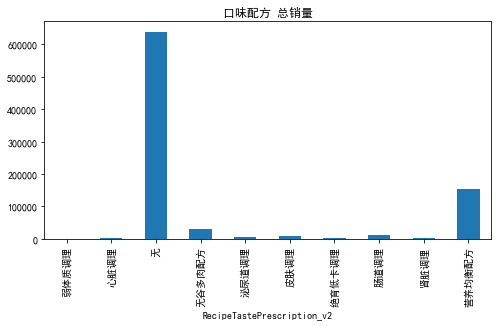

In [121]:
bjr_taste_sale = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').total_sale.sum()#
bjr_taste_sale.plot(kind ='bar')
plt.title('口味配方 总销量')

Text(0.5,1,'适用品种 总销量/产品数')

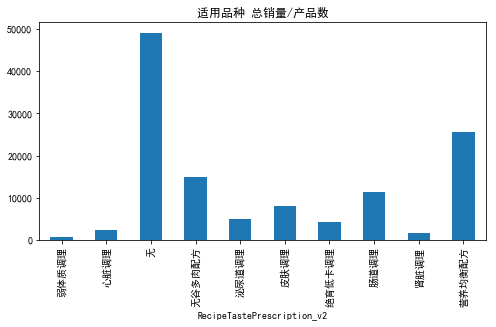

In [122]:
bjr_taste_avg_sale =bjr_taste_sale/bjr_taste
bjr_taste_avg_sale.plot(kind ='bar')
plt.title('适用品种 总销量/产品数')

#### 玛氏的什么口味配方最受欢迎？

Text(0.5,1,'口味配方 产品数')

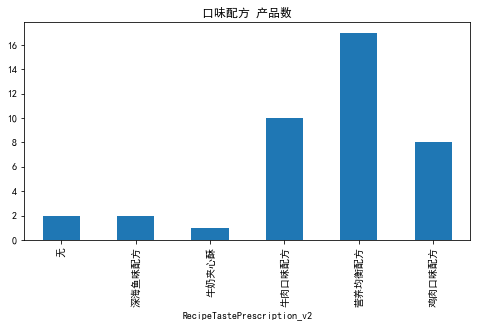

In [123]:
ms_taste = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').item_name.count()#
ms_taste.plot(kind ='bar')
plt.title('口味配方 产品数')

Text(0.5,1,'口味配方 总销量')

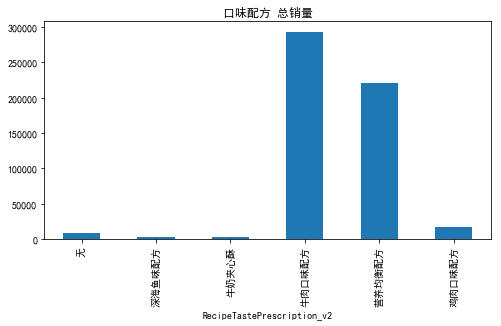

In [124]:
ms_taste_sale = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').total_sale.sum()#
ms_taste_sale.plot(kind ='bar')
plt.title('口味配方 总销量')

Text(0.5,1,'适用品种 总销量/产品数')

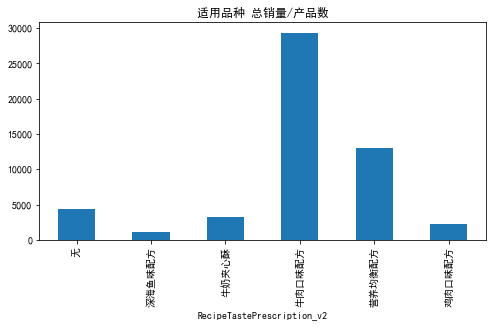

In [125]:
ms_taste_avg_sale =ms_taste_sale/ms_taste
ms_taste_avg_sale.plot(kind ='bar')
plt.title('适用品种 总销量/产品数')

#### 海洋之星什么口味最受欢迎

In [126]:
# matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
# matplotlib.rcParams['figure.figsize'] = (8.0, 4.0)

Text(0.5,1,'口味配方 产品数')

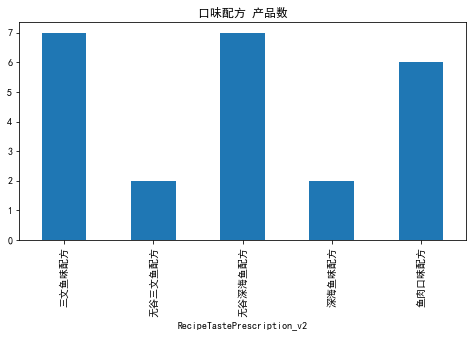

In [127]:
hyzx_taste = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').item_name.count()#
hyzx_taste.plot(kind ='bar')
plt.title('口味配方 产品数')

Text(0.5,1,'口味配方 总销量')

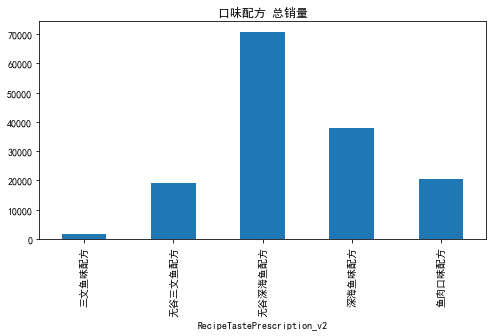

In [128]:
hyzx_taste_sale = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').total_sale.sum()#
hyzx_taste_sale.plot(kind ='bar')
plt.title('口味配方 总销量')

Text(0.5,1,'适用品种 总销量/产品数')

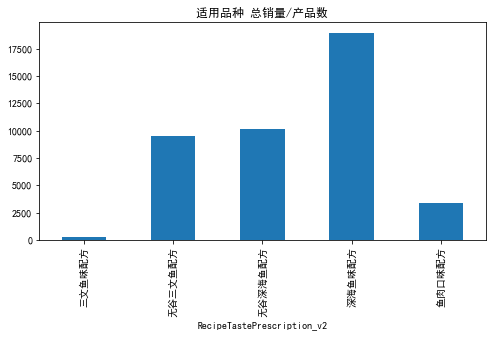

In [129]:
hyzx_taste_avg_sale =hyzx_taste_sale/hyzx_taste
hyzx_taste_avg_sale.plot(kind ='bar')
plt.title('适用品种 总销量/产品数')

#### 练习：针对适用狗狗体型和适用狗狗年龄，不同品牌的表现如何？

# 价格分析 

In [130]:
df_raw_1.columns

Index(['item_id', 'item_name', 'TradeName', 'price', 'total_sale',
       'month_sale', 'accum_comm', 'TM_points', 'CollectCount', 'Tastes',
       'BodyType', 'ApplicablePhase', 'Brand', 'Classification', 'Breed',
       'Manufacturer', 'Weight', 'Origin', 'ManufacturerAddress',
       'RecipeTastePrescription', 'item_name_cut',
       'RecipeTastePrescription_v2', 'Brand_v2', 'total_amount',
       'month_amount'],
      dtype='object')

In [131]:
hj_taste = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('RecipeTastePrescription_v2').item_name.count()
ms_taste = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').item_name.count()
bjr_taste = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').item_name.count()
hy_taste = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').item_name.count()

In [132]:
hj_taste = df_raw_1[df_raw_1['Brand_v2']=='皇家'].price
ms_taste = df_raw_1[df_raw_1['Brand_v2']=='玛氏']
bjr_taste = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉']
hy_taste = df_raw_1[df_raw_1['Brand_v2']=='海洋之星']

In [133]:
hj_avg_price = df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.count()

In [134]:
df_avg_price =DataFrame({"brand":['皇家',"玛氏","比瑞吉","海洋之星"],
         "avg_score":[df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.count(),
                     df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price.count(),
                     df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price.count(),
                     df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price.count()]}    )

Text(0.5,1,'均价')

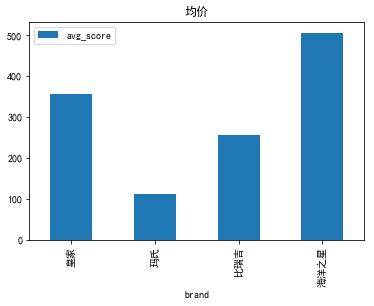

In [135]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
df_avg_price.set_index("brand").plot(kind ="bar")
plt.title('均价')

In [136]:
df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].Weight.sum()

0.05871469949312093

In [137]:
df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].Weight.sum()

0.029263199369582348

In [138]:
df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].Weight.sum()

0.0615982905982906

In [139]:
df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].Weight.sum()

0.07773401534526854

In [140]:
df_avg_price_per_w =DataFrame({"brand":['皇家',"玛氏","比瑞吉","海洋之星"],
         "avg_score":[df_raw_1[df_raw_1['Brand_v2']=='皇家'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].Weight.sum(),
                     df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].Weight.sum(),
                     df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].Weight.sum(),
                     df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].Weight.sum()]}    )

Text(0.5,1,'价格/重量')

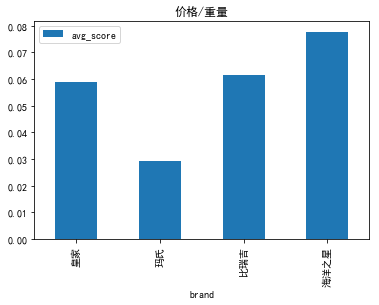

In [141]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
df_avg_price_per_w.set_index("brand").plot(kind ="bar")
plt.title('价格/重量')

In [142]:
df_raw_1[df_raw_1['Brand_v2']=='皇家'].price*1000/df_raw_1[df_raw_1['Brand_v2']=='皇家'].Weight

0      54.166667
1      95.000000
2      75.250000
3      86.666667
4      70.000000
5      82.500000
6      41.533333
7      90.000000
8      70.500000
9      86.333333
10     52.500000
11     75.500000
12     87.333333
13     67.500000
14     74.000000
15     67.200000
16     55.000000
17    104.000000
18     89.666667
19     60.750000
20     85.333333
21     37.666667
22     85.333333
23     65.000000
24     98.000000
25     38.812500
26     65.428571
27     76.250000
28     49.375000
29     80.666667
         ...    
61     78.333333
62     50.666667
63     98.666667
64     98.000000
65     54.166667
66     69.666667
67     77.333333
68     82.000000
69     70.333333
70     63.333333
71     54.000000
72     77.000000
73     62.333333
74     82.000000
75     70.500000
76     80.666667
77     78.333333
78     64.285714
79     76.000000
80     95.333333
81     47.333333
82     50.666667
83     64.750000
84     88.666667
85     58.300000
86     76.000000
87     85.000000
88     77.3333

Text(0.5,1,'海洋之星')

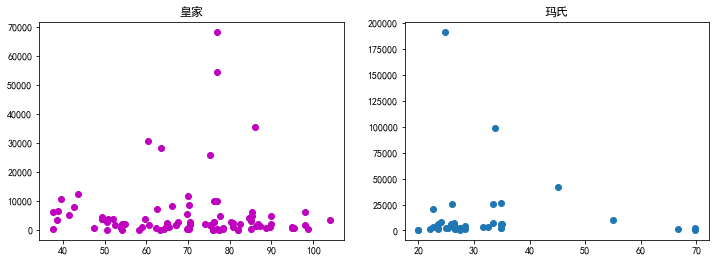

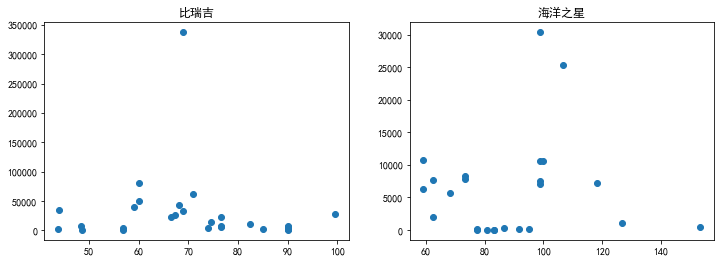

In [143]:
plt.figure(1,figsize = (12,4))  # 认为 用价格/重量   代替price会好点
plt.subplot(121)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='皇家'].price*1000/df_raw_1[df_raw_1['Brand_v2']=='皇家'].Weight,df_raw_1[df_raw_1['Brand_v2']=='皇家'].total_sale,color = 'm',label='皇家')
plt.title('皇家')
plt.subplot(122)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price*1000/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].Weight,df_raw_1[df_raw_1['Brand_v2']=='玛氏'].total_sale)
plt.title('玛氏')

plt.figure(2,figsize = (12,4))
plt.subplot(121)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price*1000/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].Weight,df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].total_sale)
plt.title('比瑞吉')
plt.subplot(122)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price*1000/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].Weight,df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].total_sale)
plt.title('海洋之星')

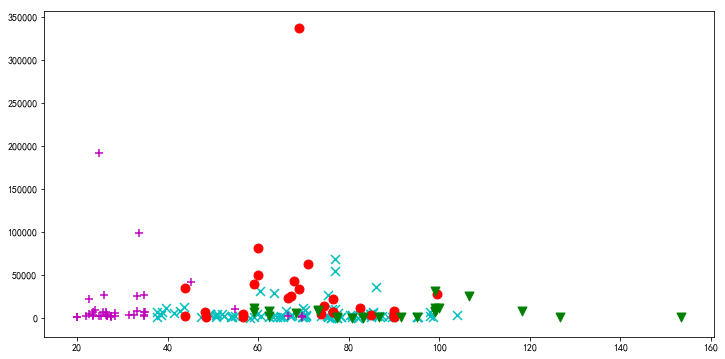

In [144]:
plt.figure(1,figsize = (12,6))
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='皇家'].price*1000/df_raw_1[df_raw_1['Brand_v2']=='皇家'].Weight,df_raw_1[df_raw_1['Brand_v2']=='皇家'].total_sale,marker = 'x',color = 'c',label='皇家',s=80)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price*1000/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].Weight,df_raw_1[df_raw_1['Brand_v2']=='玛氏'].total_sale,marker = '+',color = 'm', label='玛氏',s=80)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price*1000/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].Weight,df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].total_sale,marker = 'o',color = 'r', label='比瑞吉',s=80)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price*1000/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].Weight,df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].total_sale,marker = 'v',color = 'g', label='海洋之星',s=80)

In [145]:
df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby(df_raw_1['item_name']).total_sale.max()

item_name
[调理犬粮] 比瑞吉皮肤全期全价犬粮 添加薏苡仁 成幼通用狗粮2kg        8159
[调理犬粮]比瑞吉低卡小型成犬粮 理想体态 绝育通用低卡狗粮2kg         4283
[调理犬粮]比瑞吉心脏全价成犬粮2kg 添加丹参配方心脏调理狗粮          2314
[调理犬粮]比瑞吉泌尿道全价成犬粮 添加车前子 泌尿道狗粮2kg          5001
[调理犬粮]比瑞吉肾脏成犬粮添加菟丝子 菟丝子配方成犬狗粮2kg          1624
[调理犬粮]比瑞吉胃肠道全价全期犬粮 添加山楂 山楂肠胃狗粮2kg        11301
[调理犬粮]比瑞吉黄芪弱体质全期犬粮 含黄芪成犬幼犬通用狗粮2kg          730
比瑞吉中型犬幼犬粮 松狮金毛边牧幼犬 比瑞吉天然狗粮12KG             888
比瑞吉全犬种幼犬粮 泰迪比熊哈士奇阿拉斯加柴犬 通用狗粮12kg          1790
比瑞吉博美全价成犬粮 狗粮博美 小型犬成犬 博美狗粮2kg             6441
比瑞吉小型全价老年犬粮 高龄犬老年犬 小型犬8岁以上老年狗粮2kg        22698
比瑞吉小型幼犬粮  贵宾比熊泰迪狗粮 通用型 比瑞吉幼犬狗粮10kg        6871
比瑞吉小型幼犬粮 比熊博美吉娃娃贵宾泰迪狗粮 幼犬天然粮1.5kg        25418
比瑞吉小型成犬粮 小型犬成犬天然粮 比熊泰迪成犬比瑞吉狗粮10kg        34516
比瑞吉小型犬奶糕  泰迪比熊雪纳瑞 幼犬奶糕比瑞吉天然狗粮12KG          771
比瑞吉小型犬奶糕狗粮 全价离乳犬奶糕 泰迪比熊通用幼犬粮2kg          42612
比瑞吉新鲜全期犬粮2kg 比瑞吉新鲜粮 天然粮 通用狗粮500g*4小包     13818
比瑞吉无谷六种肉全期犬粮 非五谷狗粮 无谷多肉成犬幼犬狗粮2kg         27034
比瑞吉无谷六种肉全期犬粮 非五谷粮 6种肉多肉通用狗粮大包装8kg         2735
比瑞吉比熊全价成犬粮 狗粮比熊泪痕 成犬比熊狗粮2kg              21900
比瑞吉泰迪贵宾幼犬粮 比瑞吉狗粮幼犬 小型犬幼犬泰迪狗粮2kg          62716
比瑞吉

Text(0.5,1,'海洋之星')

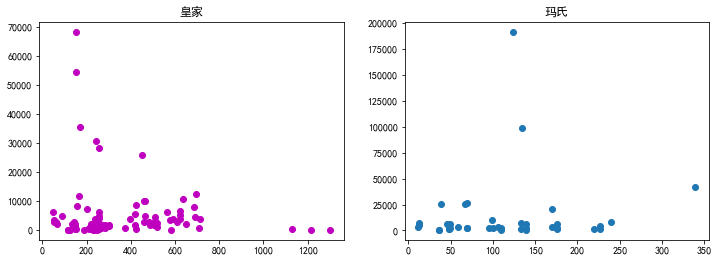

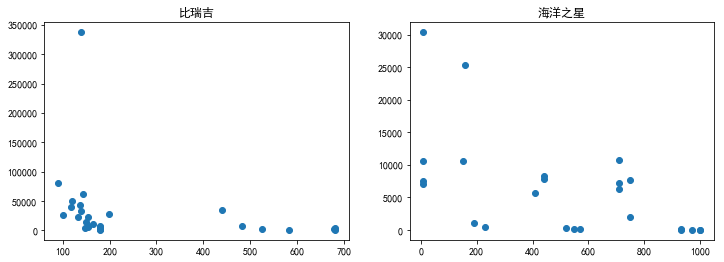

In [146]:
plt.figure(1,figsize = (12,4))  # 认为 用价格/重量   代替price会好点
plt.subplot(121)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='皇家'].price,df_raw_1[df_raw_1['Brand_v2']=='皇家'].total_sale,color = 'm',label='皇家')
plt.title('皇家')
plt.subplot(122)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price,df_raw_1[df_raw_1['Brand_v2']=='玛氏'].total_sale)
plt.title('玛氏')

plt.figure(2,figsize = (12,4))
plt.subplot(121)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price,df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].total_sale)
plt.title('比瑞吉')
plt.subplot(122)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price,df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].total_sale)
plt.title('海洋之星')

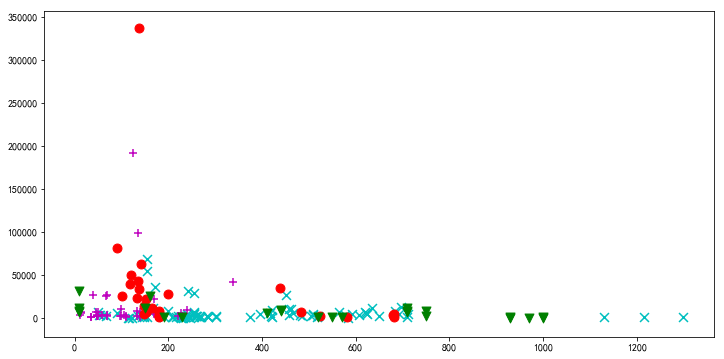

In [147]:
plt.figure(1,figsize = (12,6))
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='皇家'].price,df_raw_1[df_raw_1['Brand_v2']=='皇家'].total_sale,marker = 'x',color = 'c',label='皇家',s=80)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='玛氏'].price,df_raw_1[df_raw_1['Brand_v2']=='玛氏'].total_sale,marker = '+',color = 'm', label='玛氏',s=80)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].price,df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].total_sale,marker = 'o',color = 'r', label='比瑞吉',s=80)
plt.scatter(df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].price,df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].total_sale,marker = 'v',color = 'g', label='海洋之星',s=80)

In [148]:
plt.scatter?

价格-口味配方

Text(0.5,1,'海洋之星 价格/重量')

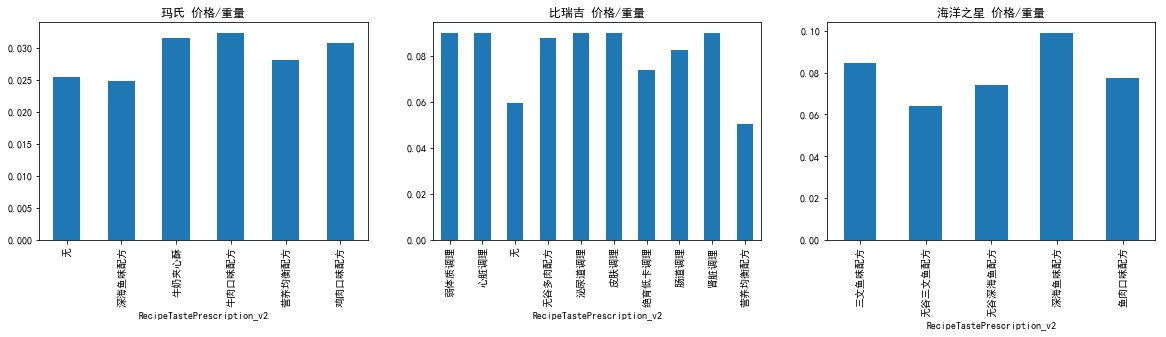

In [149]:
plt.figure(1,figsize = (20,4))
plt.subplot(131)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('RecipeTastePrescription_v2').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('玛氏 价格/重量')
plt.subplot(132)
brj_price = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('RecipeTastePrescription_v2').Weight.sum()#
brj_price.plot(kind ='bar')
plt.title('比瑞吉 价格/重量')
plt.subplot(133)
hyzx_price = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('RecipeTastePrescription_v2').Weight.sum()#
hyzx_price.plot(kind ='bar')
plt.title('海洋之星 价格/重量')

Text(0.5,1,'海洋之星 价格/重量')

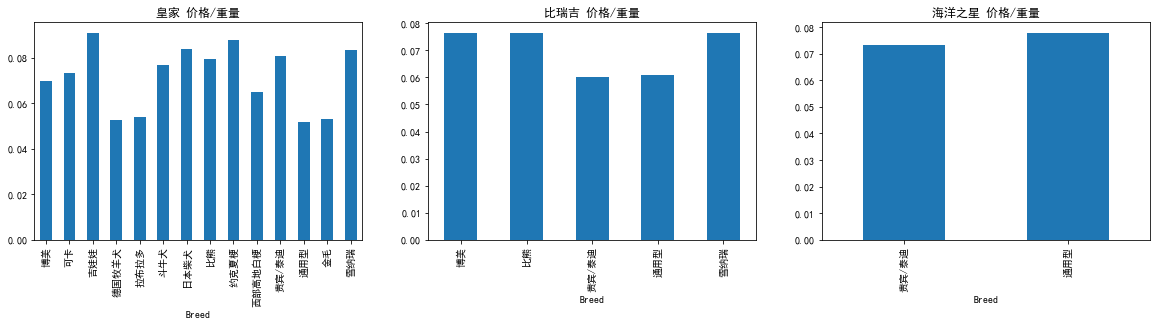

In [150]:
plt.figure(1,figsize = (20,4))
plt.subplot(131)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('Breed').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('皇家 价格/重量')
plt.subplot(132)
brj_price = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('Breed').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('Breed').Weight.sum()#
brj_price.plot(kind ='bar')
plt.title('比瑞吉 价格/重量')
plt.subplot(133)
hyzx_price = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('Breed').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('Breed').Weight.sum()#
hyzx_price.plot(kind ='bar')
plt.title('海洋之星 价格/重量')

价格 - 适用体型

Text(0.5,1,'海洋之星 价格/重量')

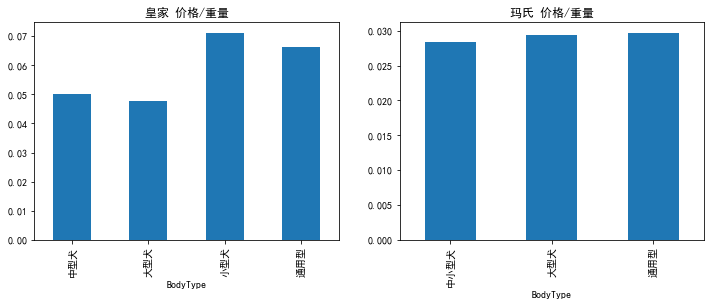

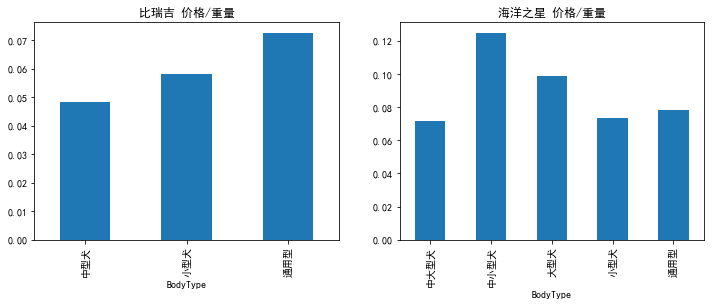

In [151]:
plt.figure(1,figsize = (12,4))
plt.subplot(121)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('BodyType').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('BodyType').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('皇家 价格/重量')
plt.subplot(122)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('BodyType').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('BodyType').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('玛氏 价格/重量')
plt.figure(2,figsize = (12,4))       
plt.subplot(121)
brj_price = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('BodyType').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('BodyType').Weight.sum()#
brj_price.plot(kind ='bar')
plt.title('比瑞吉 价格/重量')
plt.subplot(122)
hyzx_price = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('BodyType').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('BodyType').Weight.sum()#
hyzx_price.plot(kind ='bar')
plt.title('海洋之星 价格/重量')

价格 - 适用年龄

Text(0.5,1,'玛氏 价格/重量')

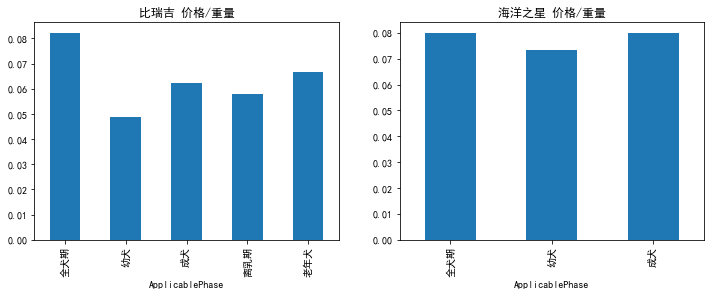

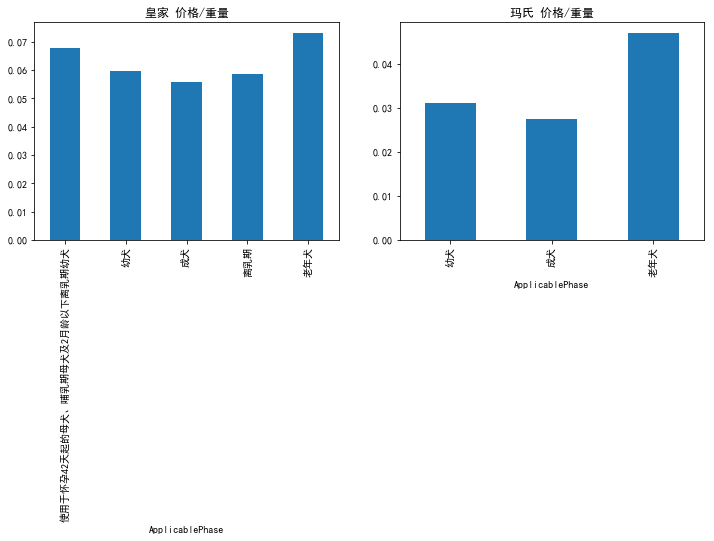

In [152]:
plt.figure(1,figsize = (12,4))       
plt.subplot(121)
brj_price = df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('ApplicablePhase').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='比瑞吉'].groupby('ApplicablePhase').Weight.sum()#
brj_price.plot(kind ='bar')
plt.title('比瑞吉 价格/重量')
plt.subplot(122)
hyzx_price = df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('ApplicablePhase').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='海洋之星'].groupby('ApplicablePhase').Weight.sum()#
hyzx_price.plot(kind ='bar')
plt.title('海洋之星 价格/重量')
plt.figure(2,figsize = (12,4))
plt.subplot(121)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('ApplicablePhase').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='皇家'].groupby('ApplicablePhase').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('皇家 价格/重量')
plt.subplot(122)
ms_price = df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('ApplicablePhase').price.sum()/df_raw_1[df_raw_1['Brand_v2']=='玛氏'].groupby('ApplicablePhase').Weight.sum()#
ms_price.plot(kind ='bar')
plt.title('玛氏 价格/重量')


In [153]:
df_raw_1.to_csv('清洗后数据_狗粮.csv')

# 数据处理（二）

In [154]:
df_raw_2 = pd.read_excel(r"D:\CDA课件\python 机器学习\7_电商文本挖掘\Product_comments_rawdata.xlsx") # 96,531 rows x 22 columns
df_raw_2.columns

Index(['brand', 'cmsSource', 'sellerId', 'item_id', 'id', 'displayUserNick',
       'rateContent', 'pics_0', 'pics_1', 'pics_2', 'pics_3', 'pics_4',
       'rateDate', 'reply', 'content', 'commentTime', 'tamllSweetLevel',
       'tradeEndTime'],
      dtype='object')

In [155]:
len(df_raw_2)

96531

In [156]:
print("min comment time:",min(df_raw_2.rateDate))
print("max comment time:",max(df_raw_2.rateDate))

min comment time: 2016-03-27 07:11:10
max comment time: 2018-03-31 21:35:11


In [157]:
df_raw_2.head(2)

,brand,cmsSource,sellerId,item_id,id,displayUserNick,rateContent,pics_0,pics_1,pics_2,pics_3,pics_4,rateDate,reply,content,commentTime,tamllSweetLevel,tradeEndTime
0,royalcanin,天猫,1728261286,19045209534,342988772811,万***娆,第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗,//img.alicdn.com/bao/uploaded/i3/0/TB2yRxwa_qW...,//img.alicdn.com/bao/uploaded/i1/0/TB2fiJbaVko...,NaN,NaN,NaN,2018-03-16 18:42:18,NaN,NaN,NaT,0,2018-03-16 10:39:49
1,royalcanin,天猫,1728261286,19045209534,343864372011,水***7,闻起来有种奶味～还不错。,//img.alicdn.com/bao/uploaded/i4/0/TB2E2NrfYSY...,NaN,NaN,NaN,NaN,2018-03-24 17:22:00,NaN,NaN,NaT,0,2018-03-21 14:26:20


In [198]:
df_raw_2[['rateContent','content']].head(100)

,rateContent,content
0,第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗,NaN
1,闻起来有种奶味～还不错。,NaN
2,我们小红包很爱吃，?也很正常。第一天没有泡够时间，吃吐了。不过后来就好了。就是有点贵，别的没...,NaN
3,此用户没有填写评论!,差评！差评！差评！当时一次买了两袋，第一袋子吃了20天之后狗狗开始拉肚子，于是给狗狗换馒头和...
4,靠谱 打开很香不腥,NaN
5,东西蛮不错的，希望能有用，我的德牧也很爱吃。,NaN
6,很好，包装扎实，品牌信得过,NaN
7,划算～多做活动呀～狗狗爱吃…不过我们家狗狗也是真的不挑食了…简直什么都想吃,NaN
8,第二次买,NaN
9,宝贝买的很划算，其他就不评价了,NaN


In [202]:
df_raw_2[['rateContent','content']][df_raw_2.rateContent=='此用户没有填写评论!']

,rateContent,content
3,此用户没有填写评论!,差评！差评！差评！当时一次买了两袋，第一袋子吃了20天之后狗狗开始拉肚子，于是给狗狗换馒头和...
43,此用户没有填写评论!,好
47,此用户没有填写评论!,皇家德牧幼犬狗粮很好，狗宝宝很爱吃
52,此用户没有填写评论!,挺好的
58,此用户没有填写评论!,NaN
71,此用户没有填写评论!,吃了泪痕比较严重
82,此用户没有填写评论!,皇家品牌完蛋了，你怎么让我们相信？真心差劲，每次都给好评，因为相信品牌相信天猫。结果发现这么...
129,此用户没有填写评论!,发货快包装精致，收到货电话验证是正品，狗狗很喜欢吃，一个月了长得也快，特别是毛长得好，今天去...
160,此用户没有填写评论!,一个是上个月买的（颜色浅.显得饱满），一个是这次买的颜色深不饱满。不知为什么？
170,此用户没有填写评论!,好


In [160]:
# " ".join(aaa) list 合并连接字符串的方法
aaa=['stt','hiud']
bbb=[]
content = "...".join(aaa)
bbb.append(content)
bbb

['stt...hiud']

In [211]:
df_raw_2.content[0]

'差评！差评！差评！当时一次买了两袋，第一袋子吃了20天之后狗狗开始拉肚子，于是给狗狗换馒头和鸡肉吃了4天，狗狗不拉稀了，我以为是第一袋开了太长时间于是就把第一袋剩余的狗粮扔了，打开了第二袋，第二代吃了两天之后狗狗又开始拉稀，我觉得应该是狗粮有问题，请大家慎重购买。'

In [212]:
not pd.isnull(df_raw_2.content[0]) # 判断是空 返回 true    加not 后为 false

False

In [161]:
Comment = []
for i in range(len(df_raw_2)):
    if df_raw_2.rateContent[i] == '此用户没有填写评论!' and not pd.isnull(df_raw_2.content[i]) : # 合并评论 与 追加评论
        Comment.append(df_raw_2.content[i]) # 添加content
    elif df_raw_2.rateContent[i] == '此用户没有填写评论!':
        Comment.append('') # 满足== '此用户没有填写评论!'且 content是nan 则填空值
    elif not pd.isnull(df_raw_2.content[i]):
        Comment.append(" ".join([str(df_raw_2.rateContent[i]),str(df_raw_2.content[i])]))  # 字符串化后 用空格链接
    else:
        Comment.append(df_raw_2.rateContent[i])
    

In [162]:
len(Comment)

96531

In [163]:
Comment[0:500]

['第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗',
 '闻起来有种奶味～还不错。',
 '我们小红包很爱吃，?也很正常。第一天没有泡够时间，吃吐了。不过后来就好了。就是有点贵，别的没毛病。不过好像没有送狗粮产，不开心。跟店家说了小狗等着吃，当天就给发货了，大过年的谢谢了！',
 '差评！差评！差评！当时一次买了两袋，第一袋子吃了20天之后狗狗开始拉肚子，于是给狗狗换馒头和鸡肉吃了4天，狗狗不拉稀了，我以为是第一袋开了太长时间于是就把第一袋剩余的狗粮扔了，打开了第二袋，第二代吃了两天之后狗狗又开始拉稀，我觉得应该是狗粮有问题，请大家慎重购买。',
 '靠谱 打开很香不腥',
 '东西蛮不错的，希望能有用，我的德牧也很爱吃。',
 '很好，包装扎实，品牌信得过',
 '划算～多做活动呀～狗狗爱吃…不过我们家狗狗也是真的不挑食了…简直什么都想吃',
 '第二次买',
 '宝贝买的很划算，其他就不评价了',
 '第二袋了，赶上双11买一袋备着先，包装完好，好评先',
 '12公斤包装很好，还未吃追评吧。',
 '双十一的价格很实惠，快递也给力',
 '多次买了',
 '傻狗喜欢',
 '我家德牧第一天很爱吃，可这几天不怎么爱吃，不知怎么回事？',
 '这是第二袋了，狗狗吃了毛色蛮好的，其他暂时还不知道',
 '一直买，挺好的，就是总断货，抢到一次不容易',
 '外面箱子写的是英短猫粮。。。吓死，以为这么重，要退回去。 。。。打开一看，幸好没错。自己尝了一下，很香，口感也挺好，而且确实有股鱼虾的鲜腥味，不知道是不是发现了什么',
 '正在吃，单独吃狗粮会拉稀而且很臭，可能我狗狗不太适应狗粮。后期追评。',
 '狗狗不喜欢吃！！！习惯好评而已',
 '还行。不错。',
 '和我平时买的我个人认为还是有点小区别的 首先颜色对比 不愿来的浅还有 狗粮很湿一样 搞的我还买了4大袋呢',
 '寄来的是成犬又要寄回去再换…希望发货能进行复查，这样的大件寄来寄去非常不方便…',
 '跟平时买的好像不太一样',
 '好大一袋这样不好保存吧？而且也没有赠品待遇还不一样，而且狗狗吃了几次就不爱吃了。',
 '回购',
 '可以',
 '可以',
 '很好',
 '挺好',
 '爱吃',
 '还行。不错。',
 '数量足',
 '东西很好，连续2

In [164]:
df_raw_2['Comment']= Comment

In [165]:
len(df_raw_2[df_raw_2.Comment== '']) # 查看有多少条没any评论的

442

In [166]:
jieba.load_userdict('AddWords.txt') # 添加关键字 列表
Comment_cut=[]
for i in df_raw_2.Comment:
    j=jieba.lcut(str(i)) # lcut()切成list
    Comment_cut.append(j)

In [167]:
df_raw_2['Comment_cut'] = Comment_cut

In [213]:
df_raw_2.head(1)

,brand,cmsSource,sellerId,item_id,id,displayUserNick,rateContent,pics_0,pics_1,pics_2,pics_3,pics_4,rateDate,reply,content,commentTime,tamllSweetLevel,tradeEndTime,Comment,Comment_cut
0,royalcanin,天猫,1728261286,19045209534,342988772811,万***娆,第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗,//img.alicdn.com/bao/uploaded/i3/0/TB2yRxwa_qW...,//img.alicdn.com/bao/uploaded/i1/0/TB2fiJbaVko...,NaN,NaN,NaN,2018-03-16 18:42:18,NaN,NaN,NaT,0,2018-03-16 10:39:49,第二次购买，可以说营养很好了。狗子长得不像两个月小狗狗。如果不是有个慢食盆，估计30秒解决战斗,"[第二次, 购买, ，, 可以, 说, 营养, 很好, 了, 。, 狗子, 长得, 不, 像..."


# 评论概况

In [215]:
df_raw_2.brand.value_counts()

royalcanin    31377
biruiji       29292
marspet       21894
fish4dogs     13968
Name: brand, dtype: int64

rcParams是自定义控制样式最全面也是最细致的方法，但不见得是最佳的方法。因为我们很多时候并不想花费这么多的时间去设置一堆堆参数，于是会想到能不能使用模板呢？呵，聪明又懒惰的人类！怎么可能没有呢！使用样式模板很简单：

plt.style.use('ggplot') # ggplot是其中一种预设样式,会使用R的同学应该非常熟悉

print(plt.style.available) # 查看所有预设样式

Text(0.5,1,'过去两年评论数量')

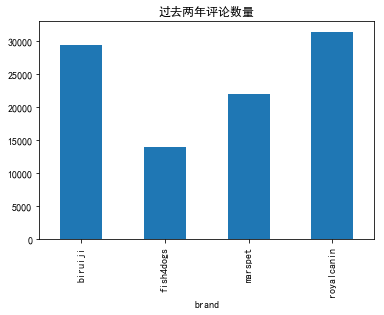

In [170]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
df_raw_2.groupby('brand').Comment.count().plot(kind='bar')
plt.title('过去两年评论数量')

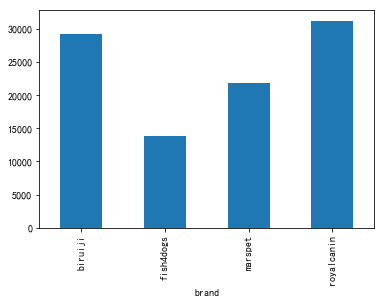

In [171]:
df_raw_2[df_raw_2['Comment']!=''].groupby('brand').Comment.count().plot(kind='bar')  # 排除空评论的记录

# 评论文本挖掘

In [172]:
from wordcloud import WordCloud

#### royalcanin

In [173]:
comm_hj = df_raw_2[df_raw_2['brand'] =='royalcanin']['Comment_cut'] # 显示与条件换位子不影响
len(comm_hj)

31377

In [216]:
comm_hj = df_raw_2['Comment_cut'][df_raw_2['brand'] =='royalcanin']  # 选择皇家的评论
len(comm_hj)

31377

In [174]:
type(comm_hj)

pandas.core.series.Series

In [277]:
comm_hj[0]

['第二次',
 '购买',
 '，',
 '可以',
 '说',
 '营养',
 '很好',
 '了',
 '。',
 '狗子',
 '长得',
 '不',
 '像',
 '两个',
 '月',
 '小狗狗',
 '。',
 '如果',
 '不是',
 '有个',
 '慢食',
 '盆',
 '，',
 '估计',
 '30',
 '秒',
 '解决',
 '战斗']

In [176]:
comm_hj_v2=[] # 拆词
for i in range(len(comm_hj)):
    comm_hj_v2 =comm_hj_v2 +comm_hj[i]

In [177]:
len(comm_hj_v2)

430045

In [178]:
words_df = pd.DataFrame({'segment': comm_hj_v2}) # 形成一个评论词库

In [179]:
words_df.head(100)

,segment
0,第二次
1,购买
2,，
3,可以
4,说
5,营养
6,很好
7,了
8,。
9,狗子


In [225]:
np.size

<function numpy.size(a, axis=None)>

In [226]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [227]:
# 生成词云图，WordCloud默认不支持中文，需要自己下载好中文字库
wordcloud = WordCloud(font_path="simhei.ttf", background_color="white", max_font_size=80)
word_frequence = {x[0]: x[1] for x in words_stat.head(1000).values}  # 选取前1000 高频词  0取词 1取频率  形成字典
word_frequence_list=[]
for key in word_frequence:
    temp = (key, word_frequence[key])
    word_frequence_list.append(temp)

In [232]:
print(word_frequence)
print(word_frequence_list)

{'吃': 13779, ' ': 10854, '狗狗': 9300, '买': 6767, '狗粮': 5060, '喜欢': 4740, '不错': 4115, '爱吃': 3987, '很好': 3383, '我家': 3093, '皇家': 2149, '挺': 1957, '好评': 1711, '送': 1595, '购买': 1357, '双十一': 1306, '宝贝': 1276, '正品': 1232, '狗': 1163, '满意': 1154, '活动': 1131, '物流': 1101, '发货': 1090, '希望': 1070, '收到': 967, '东西': 964, '一如既往': 945, '快递': 933, '很快': 917, '包装': 875, '说': 869, '换': 794, '好好': 792, '划算': 789, '狗子': 782, '第二次': 720, '价格': 712, '家里': 707, '特别': 693, '客服': 686, '完': 681, '牌子': 669, '这家': 667, '感觉': 654, '第一次': 621, '粮': 616, '奶糕': 600, '速度': 599, '不吃': 598, '便宜': 593, '优惠': 593, '真的': 564, '贵': 549, '宝宝': 546, '卖家': 531, '味道': 507, '颗粒': 496, '赠品': 495, '谢谢': 495, '小狗': 493, '放心': 488, '质量': 465, '顾客': 460, '旗舰店': 453, '家': 450, '超级': 442, '囤货': 427, '店家': 425, '这款': 415, '挑食': 409, '评价': 388, '不爱吃': 383, '泪痕': 377, '下次': 369, '双11': 368, '回购': 361, '一点': 349, '老客户': 332, '点': 329, '碗': 328, '服务': 326, '每次': 315, '品牌': 306, '香': 306, '一袋': 303, '赞': 299, '还会': 282, '幼犬粮': 277, '囤': 276, '

In [231]:
dict(word_frequence_list)

{'吃': 13779,
 ' ': 10854,
 '狗狗': 9300,
 '买': 6767,
 '狗粮': 5060,
 '喜欢': 4740,
 '不错': 4115,
 '爱吃': 3987,
 '很好': 3383,
 '我家': 3093,
 '皇家': 2149,
 '挺': 1957,
 '好评': 1711,
 '送': 1595,
 '购买': 1357,
 '双十一': 1306,
 '宝贝': 1276,
 '正品': 1232,
 '狗': 1163,
 '满意': 1154,
 '活动': 1131,
 '物流': 1101,
 '发货': 1090,
 '希望': 1070,
 '收到': 967,
 '东西': 964,
 '一如既往': 945,
 '快递': 933,
 '很快': 917,
 '包装': 875,
 '说': 869,
 '换': 794,
 '好好': 792,
 '划算': 789,
 '狗子': 782,
 '第二次': 720,
 '价格': 712,
 '家里': 707,
 '特别': 693,
 '客服': 686,
 '完': 681,
 '牌子': 669,
 '这家': 667,
 '感觉': 654,
 '第一次': 621,
 '粮': 616,
 '奶糕': 600,
 '速度': 599,
 '不吃': 598,
 '便宜': 593,
 '优惠': 593,
 '真的': 564,
 '贵': 549,
 '宝宝': 546,
 '卖家': 531,
 '味道': 507,
 '颗粒': 496,
 '赠品': 495,
 '谢谢': 495,
 '小狗': 493,
 '放心': 488,
 '质量': 465,
 '顾客': 460,
 '旗舰店': 453,
 '家': 450,
 '超级': 442,
 '囤货': 427,
 '店家': 425,
 '这款': 415,
 '挑食': 409,
 '评价': 388,
 '不爱吃': 383,
 '泪痕': 377,
 '下次': 369,
 '双11': 368,
 '回购': 361,
 '一点': 349,
 '老客户': 332,
 '点': 329,
 '碗': 328,
 '服务': 326,
 '每次': 

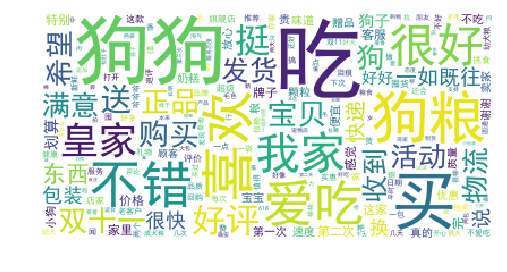

<Figure size 600x300 with 0 Axes>

In [241]:
# 显示图片
plt.rcParams['figure.figsize'] = (6.0,3.0)
wordcloud = wordcloud.fit_words(dict(word_frequence_list))  # ?为什么不直接用word_frequence
plt.imshow(wordcloud)   # 以图片形式显示词云
plt.axis('off')     # 关闭图像坐标系
plt.show()
plt.savefig('plot123_1.png', dpi=1200)

In [240]:
from IPython.core.pylabtools import figsize
figsize(12.5, 4)
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.rcParams['savefig.dpi'] = 100 #图片像素

- 很多干扰词存在，且词频很高
- 图片像素不够清晰

###### 引入停用词

In [244]:
stopwords = pd.read_csv('stopwords.txt', index_col=False, quoting=3, sep='\t', names=['stopword'],
                        encoding='utf-8')  # quoting=3全不引用

In [245]:
type(stopwords)

pandas.core.frame.DataFrame

In [246]:
stopwords

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [247]:
stopwords_list = stopwords.values

In [248]:
type(stopwords_list)

numpy.ndarray

In [255]:
stopwords_list[0:5]

'!'

In [252]:
# 定义另一个变换list形式的函数    将多维list转化为 以为list
def list2_list(list_list, list):
    for item in list_list:
        list_item = item[0]
        list.append(list_item)
    return list

In [253]:
stopwords_list = list2_list(stopwords_list, [])

In [254]:
stopwords_list[0:5]

['!', '"', '#', '$', '%']

In [256]:
stopwords.stopword

0                         !
1                         "
2                         #
3                         $
4                         %
5                         &
6                         '
7                         (
8                         )
9                         *
10                        +
11                        ,
12                        -
13                       --
14                        .
15                       ..
16                      ...
17                   ......
18      ...................
19                       ./
20                       .一
21                       记者
22                        数
23                        年
24                        月
25                        日
26                        时
27                        分
28                        秒
29                        /
               ...         
2603                     01
2604                     02
2605                     03
2606                     04
2607                

In [257]:
words_df

,segment
0,第二次
1,购买
4,说
5,营养
6,很好
9,狗子
10,长得
13,两个
15,小狗狗
19,有个


In [194]:
words_df = words_df[~words_df.segment.isin(stopwords.stopword)] # 取反的操作  去停用词
len(words_df)

206442

In [195]:
len(comm_hj_v2)

430045

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


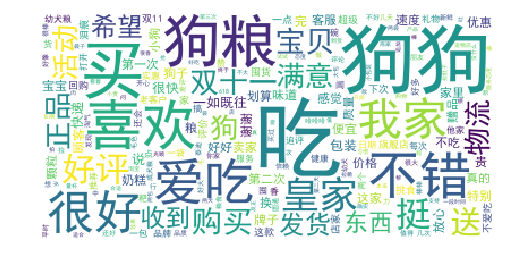

In [258]:
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)  # 将词库生成词云图的前期操作
# 生成词云图，
wordcloud = WordCloud(font_path="simhei.ttf", background_color="white", max_font_size=80)
word_frequence = {x[0]: x[1] for x in words_stat.head(1000).values}
word_frequence_list=[]
for key in word_frequence:
    temp = (key, word_frequence[key])
    word_frequence_list.append(temp)

# 显示图片
wordcloud = wordcloud.fit_words(dict(word_frequence_list))
plt.imshow(wordcloud)   # 以图片形式显示词云
plt.axis('off')     # 关闭图像坐标系
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


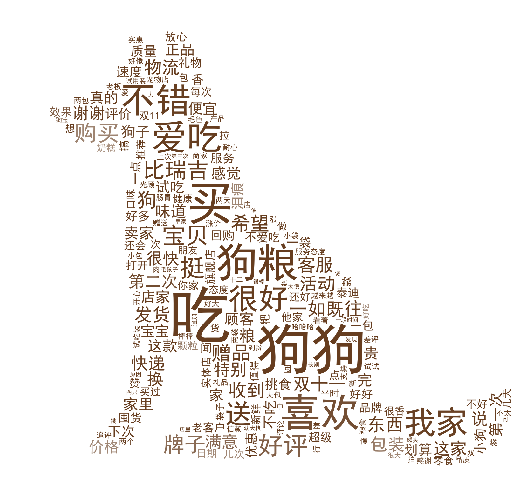

In [295]:
# 自定义显示词云图形状
from wordcloud import WordCloud,ImageColorGenerator
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)
# from scipy.misc import imread
# bimg=imread('image/dog_1.jpg')
# `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
import imageio
bimg = imageio.imread('dog_2.jpg')

words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=200,font_path='data/simhei.ttf')
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)

bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_hj.png')

#### biruiji

In [273]:
comm_brj = df_raw_2[df_raw_2['brand'] =='biruiji']['Comment_cut']
len(comm_brj)

29292

In [281]:
comm_brj

53271    [宝贝, 收到, 啦, ，, 不错, 跟, 家里, 的, 一模一样, ，, 这, 是, 给,...
53272                            [我家, 的, 斗牛, 是, 个, 贪吃鬼, ?]
53273                [包装, 严实, 、, 发货, 及时, 、, 吃, 完, 再, 来, ！]
53274    [狗粮, 非常, 的, 香, ，, 感谢, 客服, 赠送, 的, 试, 吃粮, 。, 泰迪,...
53275                          [胖子, 吃, ，, 小, 一点, 能, 好, 消化]
53276                                     [毛孩子, 超级, 喜欢, 吃]
53277    [很大, 包, ，, 我们, 家, 小狗, 能, 吃, 到, 下, 一面, 双十一, 了, ...
53278                                           [可, 喜欢, 了]
53279    [家里, 又, 添, 了, 小狗, 宝, ，, 大, 狗宝, 小时, 也, 吃, 的, 比瑞...
53280                [我们, 家, 狗狗, 不好, 好吃, 狗粮, ，, 买, 奶糕, 试试]
53281        [我家, 狗狗, 已经, 吃, 这款, 狗粮, 好多年, 了, ，, 它们, 很, 喜欢]
53282                               [我家, 一直, 吃, 这个,  , 爱吃]
53283                                   [我家, 基超, 喜欢, 吃, ，]
53284    [双十一, 期间, 买, 的, ，, 过, 了, 好久, 才, 收到, ，, 没, 办法, ...
53285    [我, 的, 天呐, ，, 那么, 大, 一包, ，, 你, 可以, 想象, 吗, ，, 我...
53286    [物流, 真的, 是, 超级, 慢, ，, 害, 得, 我家, 两只, 狗, 断粮, 了, ...
53287               [试用装, 日期, 新鲜, ，, 春游, 外出, 携带, ，, 很, 方

In [ ]:
comm_brj =comm_brj.reset_index(drop =True) # 因为索引还是原来是的索引 导致切不了词 故需reset 索引

In [288]:
comm_brj_v2=[]
for i in range(len(comm_brj)):
    comm_brj_v2 =comm_brj_v2 + comm_brj[i]

In [289]:
len(comm_brj_v2)

415780

In [290]:
comm_brj_v2[0:10]

['宝贝', '收到', '啦', '，', '不错', '跟', '家里', '的', '一模一样', '，']

In [291]:
stop = [' ','N']
comm_brj_v3 = [w for w in comm_brj_v2 if(w not in stop)]
len(comm_brj_v3)

405539

In [292]:
words_df = pd.DataFrame({'segment': comm_brj_v3})
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
print('Brfore Stopwords: ',len(comm_brj_v3))    
print('After Stopwords: ',len(words_df)) 
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

Brfore Stopwords:  405539
After Stopwords:  189444


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


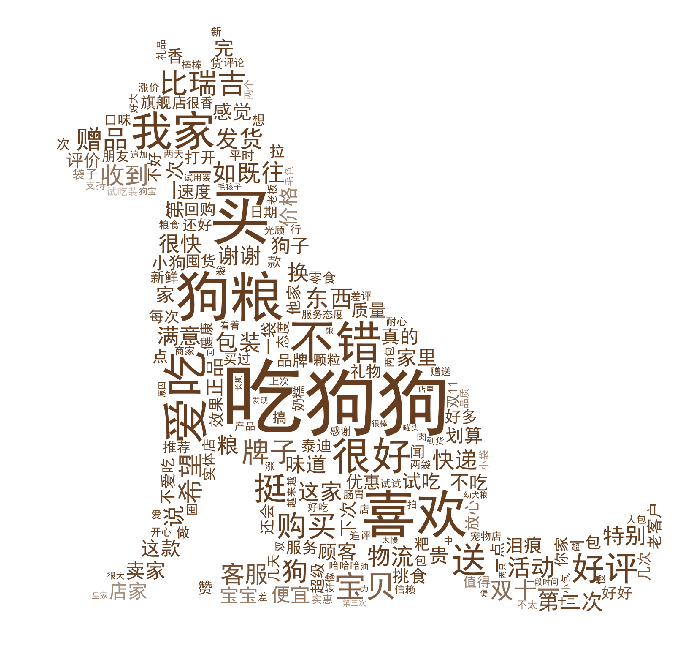

In [294]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('dog_2.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=200,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}

wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_brj.png')

In [296]:
word_frequence

{'吃': 13630,
 '狗狗': 9956,
 '买': 7072,
 '狗粮': 5398,
 '喜欢': 5008,
 '爱吃': 3929,
 '不错': 3832,
 '我家': 3146,
 '很好': 2800,
 '送': 2324,
 '挺': 1884,
 '好评': 1884,
 '宝贝': 1578,
 '购买': 1502,
 '比瑞吉': 1405,
 '牌子': 1319,
 '赠品': 1118,
 '狗': 1101,
 '希望': 1069,
 '东西': 979,
 '一如既往': 977,
 '发货': 955,
 '活动': 954,
 '收到': 951,
 '客服': 944,
 '物流': 899,
 '双十一': 885,
 '包装': 866,
 '快递': 844,
 '说': 824,
 '这家': 813,
 '谢谢': 786,
 '粮': 781,
 '满意': 767,
 '特别': 760,
 '第二次': 759,
 '很快': 756,
 '换': 751,
 '味道': 667,
 '卖家': 652,
 '价格': 650,
 '家里': 639,
 '这款': 622,
 '第一次': 618,
 '正品': 615,
 '感觉': 614,
 '完': 602,
 '顾客': 566,
 '狗子': 564,
 '店家': 561,
 '贵': 558,
 '便宜': 554,
 '试吃': 553,
 '不吃': 545,
 '真的': 526,
 '家': 517,
 '宝宝': 512,
 '泪痕': 496,
 '划算': 491,
 '下次': 466,
 '质量': 454,
 '挑食': 453,
 '优惠': 442,
 '速度': 439,
 '小狗': 429,
 '评价': 425,
 '香': 414,
 '一袋': 398,
 '好多': 394,
 '一包': 380,
 '服务': 377,
 '回购': 375,
 '不爱吃': 365,
 '旗舰店': 361,
 '囤货': 353,
 '闻': 345,
 '品牌': 343,
 '一点': 342,
 '好好': 342,
 '礼物': 337,
 '泰迪': 334,
 '超级': 331,
 

In [297]:
comm_ms = df_raw_2[df_raw_2['brand'] =='marspet']['Comment_cut']
print("Counts of Comment: ",len(comm_ms))
comm_ms =comm_ms.reset_index(drop =True)
comm_ms_v2=[]
for i in range(len(comm_ms)):
        comm_ms_v2 =comm_ms_v2 +comm_ms[i]
comm_ms_v3 = [w for w in comm_ms_v2 if(w not in stop)]

words_df = pd.DataFrame({'segment': comm_ms_v3})
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
print('Brfore Stopwords: ',len(comm_ms_v2))    
print('After Stopwords: ',len(words_df)) 
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('image/dog_3.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=80,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_ms.png',api=1200)

Counts of Comment:  21894
Brfore Stopwords:  309215
After Stopwords:  140927


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  del sys.path[0]


FileNotFoundError: No such file: 'D:\notebook\9_电商文本挖掘案例练习\image\dog_3.jpg'

In [ ]:
comm_hyzx = df_raw_2[df_raw_2['brand'] =='fish4dogs']['Comment_cut']
print("Counts of Comment: ",len(comm_hyzx))
comm_hyzx =comm_hyzx.reset_index(drop =True)
comm_hyzx_v2=[]
for i in range(len(comm_hyzx)):
        comm_hyzx_v2 =comm_hyzx_v2 +comm_hyzx[i]
comm_hyzx_v3 = [w for w in comm_hyzx_v2 if(w not in stop)]

words_df = pd.DataFrame({'segment': comm_hyzx_v3})
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
print('Brfore Stopwords: ',len(comm_hyzx_v2))    
print('After Stopwords: ',len(words_df)) 
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('image/dog_4.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=150,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_hyzx.png',api=1200)

In [ ]:
comm_total = df_raw_2['Comment_cut']
print("Counts of Comment: ",len(comm_total))
comm_total_v2=[]
for i in range(len(comm_hyzx)):
        comm_total_v2 =comm_total_v2 +comm_total[i]
comm_total_v3 = [w for w in comm_total_v2 if(w not in stop)]

words_df = pd.DataFrame({'segment': comm_total_v3})
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
print('Brfore Stopwords: ',len(comm_total_v2))    
print('After Stopwords: ',len(words_df)) 
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'counts':np.size})
words_stat = words_stat.reset_index().sort_values(by=['counts'], ascending=False)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('image/dog_5.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=120,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(300).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_total.png',api=1200)

In [ ]:
type(word_frequence)

###### TF-IDF --提取关键词

In [ ]:
df_comm = df_raw_2.Comment.astype('str')
lines=df_comm.values.tolist()
# lines_v2 = [w for w in lines if(w not in stop)]
content = "".join(lines)

In [ ]:
lines[6440]

In [ ]:
len(content)

In [ ]:
print( "  ".join(analyse.extract_tags(content, topK=80, withWeight=False, allowPOS=())))

In [ ]:
print( "  ".join(analyse.extract_tags(content, topK=80, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v'))))

In [ ]:
len(lines)

In [ ]:
weight =analyse.extract_tags(content, topK=300, withWeight=True, allowPOS=('ns', 'n', 'vn', 'v'))

In [ ]:
weight

In [ ]:
a_word = []
b_weight = []
for i in weight:
    a_word.append(i[0])
    b_weight.append(i[1])
word_weight = dict(zip(a_word,b_weight))  

In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
bimg = imageio.imread('image/dog_5.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=120,font_path='data/simhei.ttf',)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_weight)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.savefig('plot_total_tfidf.png',api=1200)

In [ ]:
def tfidf(brand,image,size,save):
    df = df_raw_2[df_raw_2['brand'] == brand]['Comment'].astype('str')
    lines=df.values.tolist()
    content = "".join(lines)
    weight =analyse.extract_tags(content, topK=300, withWeight=True, allowPOS=())
    a_word = []
    b_weight = []
    for i in weight:
        a_word.append(i[0])
        b_weight.append(i[1])
    word_weight = dict(zip(a_word,b_weight)) 
    matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
    bimg = imageio.imread(image)
    wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=size,font_path='data/simhei.ttf',)
    word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
    wordcloud=wordcloud.fit_words(word_weight)
    bimgColors=ImageColorGenerator(bimg)
    plt.axis("off")
    plt.imshow(wordcloud.recolor(color_func=bimgColors))
    plt.savefig(save,api=1200) 
#     return wordcloud,bimgColors

In [ ]:
tfidf('royalcanin', 'image/dog_1.jpg',120,'plot_hj_iftdf.png')

In [ ]:
plt.figure(1,figsize = (18,16))
plt.subplot(221)
tfidf('royalcanin', 'image/dog_1.jpg',100,'plot_hj_iftdf.png')
plt.title('皇家')
plt.subplot(222)
tfidf('marspet', 'image/dog_3.jpg',100,'plot_ms_iftdf.png')
plt.title('玛氏')
# plt.figure(2,figsize = (18,16))
plt.subplot(223)
tfidf('biruiji', 'image/dog_2.jpg',200,'plot_brj_iftdf.png')
plt.title('比瑞吉')
plt.subplot(224)
tfidf('fish4dogs', 'image/dog_4.jpg',150,'plot_hyzx_iftdf.png')
plt.title('海洋之星')


###### 情感分析

textblog https://blog.csdn.net/u013378306/article/details/55510156

In [ ]:
import snownlp
from snownlp import SnowNLP

http://blog.sciencenet.cn/blog-377709-1062960.html

In [ ]:
s= SnowNLP('质量很差')

In [ ]:
s.words

In [ ]:
s.sentiments

In [ ]:
df_raw_2['Comment'][4]

In [ ]:
df_raw_2['Comment'][3]

In [ ]:
ss = s= SnowNLP(df_raw_2['Comment'][3])
ss.sentiments

In [ ]:
senti_hj = DataFrame(df_raw_2[df_raw_2['brand'] == 'royalcanin']['Comment'])
senti_ms = DataFrame(df_raw_2[df_raw_2['brand'] == 'marspet']['Comment'])
senti_brj = DataFrame(df_raw_2[df_raw_2['brand'] == 'biruiji']['Comment'])
senti_hyzx = DataFrame(df_raw_2[df_raw_2['brand'] == 'fish4dogs']['Comment'])

In [ ]:
def senti_core (brand_comm):
    score=[]
    for i in brand_comm.Comment:
        if str(i) != '':
            s=SnowNLP(str(i))
            score.append(s.sentiments)
        else:
            score.append('') 
    brand_comm ['Score'] = score
    return brand_comm

In [ ]:
senti_hj_score = senti_core(senti_hj)
senti_ms_score = senti_core(senti_ms)
senti_brj_score = senti_core(senti_brj)
senti_hyzx_score = senti_core(senti_hyzx)

In [ ]:
senti_ms_score

In [ ]:
plt.figure(1,figsize = (12,3))
plt.subplot(121)
senti_hj_score[senti_hj_score['Comment']!='']['Score'].hist(bins = 30)
plt.title('皇家')
plt.subplot(122)
senti_ms_score[senti_ms_score['Comment']!='']['Score'].hist(bins = 30)
plt.title('玛氏')
plt.figure(2,figsize = (12,3))
plt.subplot(121)
senti_brj_score[senti_brj_score['Comment']!='']['Score'].hist(bins = 30)
plt.title('比瑞吉')
plt.subplot(122)
senti_hyzx_score[senti_hyzx_score['Comment']!='']['Score'].hist(bins = 30)
plt.title('海洋之星')

In [ ]:
def average(seq): 
    return float(sum(seq)) / len(seq)

In [ ]:
hj_dic = {"brand":"皇家","avg_score":average(senti_hj_score[senti_hj_score['Comment']!='']['Score'])}
ms_dic = {"brand":"玛氏","avg_score":average(senti_ms_score[senti_ms_score['Comment']!='']['Score'])}
brj_dic = {"brand":"比瑞吉","avg_score":average(senti_brj_score[senti_brj_score['Comment']!='']['Score'])}
hyzx_dic = {"brand":"海洋之星","avg_score":average(senti_hyzx_score[senti_hyzx_score['Comment']!='']['Score'])}


In [ ]:
df_avg_score =DataFrame({"brand":['皇家',"玛氏","比瑞吉","海洋之星"],
                         "avg_score":[average(senti_hj_score[senti_hj_score['Comment']!='']['Score']),
                                     average(senti_ms_score[senti_ms_score['Comment']!='']['Score']),
                                     average(senti_brj_score[senti_brj_score['Comment']!='']['Score']),
                                     average(senti_hyzx_score[senti_hyzx_score['Comment']!='']['Score'])]}    )

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
df_avg_score.set_index("brand").plot(kind ="bar")

In [ ]:
pd.core.series.Series.hist?

In [ ]:
pd.core.series.Series.plot?

In [ ]:
def neg_comm(brand_comm_score):
    neg =[]
    brand_comm_score = brand_comm_score.reset_index(drop =True)
    for i in range(len(brand_comm_score.Score)):
        if brand_comm_score.Score[i] != '' and brand_comm_score.Score[i]< 0.001:
            neg.append(brand_comm_score.Comment[i])
    return neg

In [ ]:
senti_ms_score.reset_index(drop =True)

In [ ]:
senti_ms_score

In [ ]:
senti_ms_neg = neg_comm(senti_ms_score)
senti_ms_neg

In [ ]:
df=pd.DataFrame(senti_ms_neg)
df

In [ ]:
def tfidf(neg,image,size,save):
    df = df_raw_2[df_raw_2['brand'] == brand]['Comment'].astype('str')
    lines=df.values.tolist()
    content = "".join(lines)
    weight =analyse.extract_tags(content, topK=300, withWeight=True, allowPOS=())
    a_word = []
    b_weight = []
    for i in weight:
        a_word.append(i[0])
        b_weight.append(i[1])
    word_weight = dict(zip(a_word,b_weight)) 
    matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
    bimg = imageio.imread(image)
    wordcloud=WordCloud(background_color="white",mask=bimg,max_font_size=size,font_path='data/simhei.ttf',)
    word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
    wordcloud=wordcloud.fit_words(word_weight)
    bimgColors=ImageColorGenerator(bimg)
    plt.axis("off")
    plt.imshow(wordcloud.recolor(color_func=bimgColors))
    plt.savefig(save,api=1200) 